# Loading

In [ ]:
!pip install scanpy
!pip install anndata
!pip install sccoda
!pip install docrep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=0d24485ab76089fda879da6c3bb7fcd45981441b328a09c0654bb612de713ec0
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=d539b2e2d1b093086c

In [ ]:

#导入包
import anndata
print('anndata(Ver): ',anndata.__version__)
import scanpy as sc
print('scanpy(Ver): ',sc.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)
import numpy as np
print('numpy(Ver): ',np.__version__)
import pandas as pd
print('pandas(Ver): ',pd.__version__)
import sccoda 
print('sccoda(Ver): ',sccoda.__version__)

anndata(Ver):  0.9.1
scanpy(Ver):  1.9.3
matplotlib(Ver):  3.7.1
numpy(Ver):  1.22.4
pandas(Ver):  1.5.3
sccoda(Ver):  0.1.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

In [ ]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 14023 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
sc_color_Tcell=['#8A29E3',
        '#9B1A83',# 这个色卡是从张泽民课题组的论文里拔下来的
        '#C453A4',
        '#C67BAE',
        '#E68BC3',
        '#DFEAF6',
        '#9DCBE3',
        '#4292C5',
        '#0A529B',
        '#F99FB5',
        '#BC7EBC',
        '#ACD2E7',
        '#F582BD',
        '#C4DDF1', # 差异基因使用色卡 #浅色
        '#366BAF' # 差异基因使用色卡 #深色
        ]

        # 有时序的细胞亚型可以考虑颜色渐变
        

# color

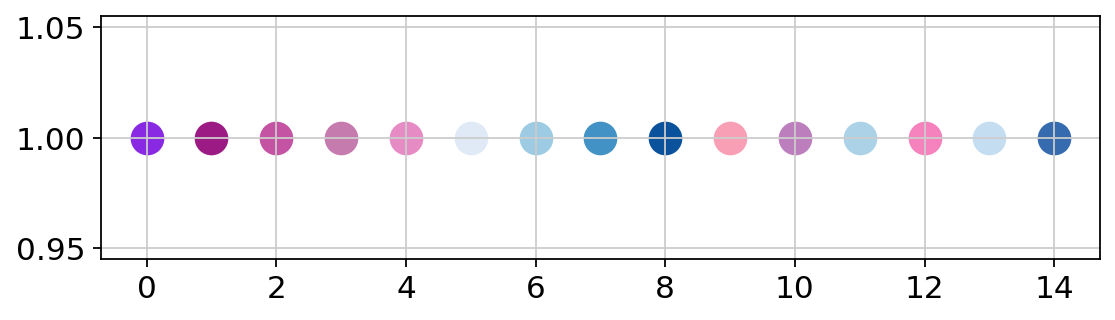

In [ ]:
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Tcell)):
    plt.scatter(i, 1, c=sc_color_Tcell[i], s=200)
plt.show()

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD4.Reg',
    '1': 'CD4.RM',
    '9': 'CD4.RM',
    '4': 'CD4.FH',
    '3': 'CD4.Naive',
    '5': 'CD4.Naive',
    '7': 'CD8.MAIT',#(exhausted)
    '0': 'CD8.EM',
    '2': 'CD8.RM',
    '10': 'CD8.RM',
    '11': 'CD8.RM',
    '12': 'CD8.RM',
    '15': 'CD8.RM',
    '13': 'CD8.EA',
    '6': 'NK.CD56_Bright',
    '14': 'NK.CD56_Dim'
}
adata.obs['T/NK_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '0': 'CD8',#上皮细胞
    '1': 'CD4',
    '2': 'CD8',
    '3': 'CD4',
    '4': 'CD4',
    '5': 'CD4',
    '6': 'NK',
    '7': 'CD8',
    '8': 'CD4',
    '9': 'CD4',
    '10': 'CD8',
    '11': 'CD8',
    '12': 'CD8',
    '13': 'CD8',
    '14': 'NK',
    '15': 'CD8',
}
adata.obs['T/NK_type'] = 0
adata.obs['T/NK_type'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [ ]:
adata.obs['T/NK_type']

AAACCTGCATCCAACA-1_0     CD8
AAACCTGGTACACCGC-1_0     CD4
AAACGGGCAATAACGA-1_0     CD8
AAACGGGGTACAGCAG-1_0     CD4
AAAGATGTCTCGCTTG-1_0      NK
                        ... 
TTTGCGCGTCCATCCT-1_11    CD8
TTTGGTTAGTACGCCC-1_11    CD4
TTTGTCACAAGACACG-1_11    CD8
TTTGTCAGTGTAACGG-1_11    CD8
TTTGTCATCTGCAAGT-1_11    CD4
Name: T/NK_type, Length: 14023, dtype: category
Categories (3, object): ['CD4', 'CD8', 'NK']

In [ ]:
type_color_rna={
    'CD8.MAIT':sc_color_Tcell[0],
    'CD8.EM':sc_color_Tcell[1],
    'CD8.RM':sc_color_Tcell[2],
    'NK.CD56_Dim':sc_color_Tcell[3],
    'CD8.EA':sc_color_Tcell[4],
    'CD4.Reg':sc_color_Tcell[7],
    'CD4.RM':sc_color_Tcell[8],
    'CD4.FH':sc_color_Tcell[6],
    'CD4.Naive':sc_color_Tcell[5],
    'NK.CD56_Bright':sc_color_Tcell[9],
}
adata.uns['T/NK_celltype_colors']=adata.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()


In [ ]:
type_color_TNK={
    'CD8':sc_color_Tcell[10],
    'CD4':sc_color_Tcell[11],
    'NK':sc_color_Tcell[12],
}
adata.uns['T/NK_type_colors']=adata.obs['T/NK_type'].cat.categories.map(type_color_TNK).values.tolist()


In [ ]:
adata.obs['Sample']

AAACCTGCATCCAACA-1_0      Pos
AAACCTGGTACACCGC-1_0      Pos
AAACGGGCAATAACGA-1_0      Pos
AAACGGGGTACAGCAG-1_0      Pos
AAAGATGTCTCGCTTG-1_0      Pos
                         ... 
TTTGCGCGTCCATCCT-1_11    Para
TTTGGTTAGTACGCCC-1_11    Para
TTTGTCACAAGACACG-1_11    Para
TTTGTCAGTGTAACGG-1_11    Para
TTTGTCATCTGCAAGT-1_11    Para
Name: Sample, Length: 14023, dtype: category
Categories (3, object): ['Neg', 'Pos', 'Para']

In [ ]:
type_color={
    'Pos':sc_color_Tcell[6],
    'Neg':sc_color_Tcell[8],
    'Para':sc_color_Tcell[10]
}
adata.uns['Sample_colors']=adata.obs['Sample'].cat.categories.map(type_color).values.tolist()


# Figure_2A 亚群表达umap图

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


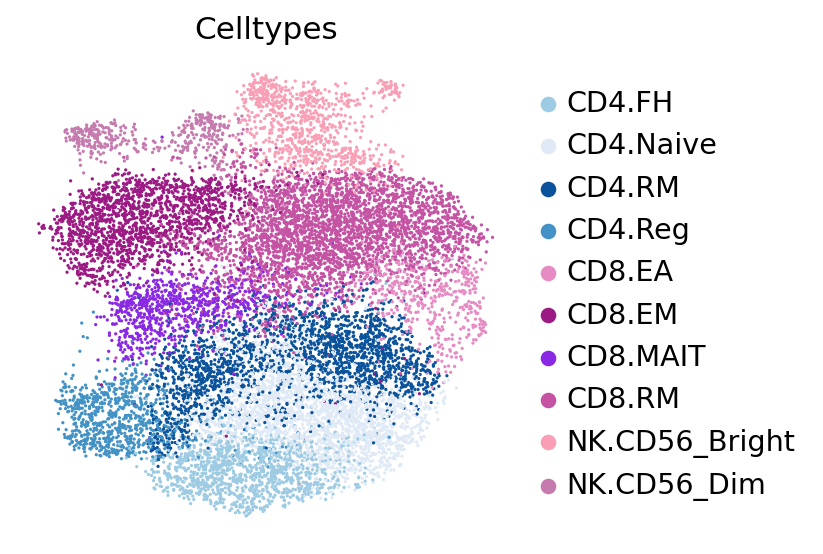

In [ ]:
ax = sc.pl.embedding(
    adata,
    basis="X_umap",
    color='T/NK_celltype',
    title='Celltypes',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


plt.savefig("Figure2_celltype_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_celltype_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


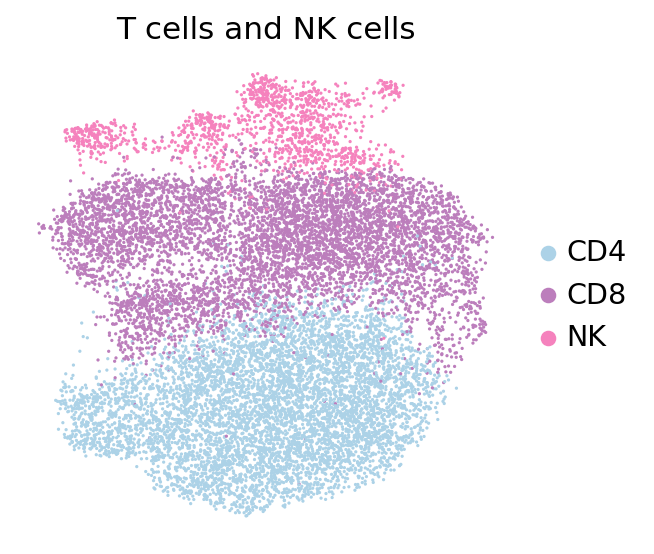

In [ ]:
ax = sc.pl.embedding(
    adata,
    basis="X_umap",
    color='T/NK_type',
    title='T cells and NK cells',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


plt.savefig("Figure2_type_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_type_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')

# Figure_2B Type表达umap图

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


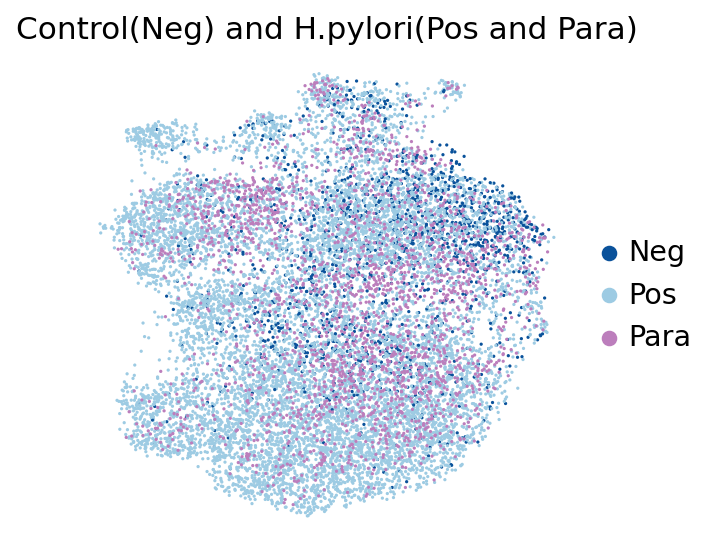

In [ ]:
ax = sc.pl.embedding(
    adata,
    basis="X_umap",
    color='Sample',
    title='Control(Neg) and H.pylori(Pos and Para)',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


plt.savefig("Figure2_pos_neg_Umap.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_pos_neg_Umap.png",dpi=300,bbox_inches = 'tight')

# Figure_2C (pycomplexheatmap)

In [ ]:
!pip install git+https://github.com/DingWB/PyComplexHeatmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DingWB/PyComplexHeatmap to /tmp/pip-req-build-o8ahqyka
  Running command git clone --filter=blob:none --quiet https://github.com/DingWB/PyComplexHeatmap /tmp/pip-req-build-o8ahqyka
  Resolved https://github.com/DingWB/PyComplexHeatmap to commit 32c0e1b20d57c11cd6d5677a94af2744a2450b0f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyComplexHeatmap: filename=PyComplexHeatmap-1.4.3-py3-none-any.whl size=56794 sha256=59b8a1918897b4830e716b7b8c90cb13cee0b2e5d7b5a7aae798b0d8ad4712f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-a7ra9ias/wheels/4d/b8/1e/ea6d4aeaa8827cec4c0f1eddc2027e56436d1edcc7091907c5
Successfully built PyComplexHeatmap


In [ ]:
import os,sys               #与python解释器进行交互的库
import PyComplexHeatmap
from PyComplexHeatmap import *
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi']  = 120
plt.rcParams['savefig.dpi'] = 300    #设置保存的图片大小

In [ ]:
# 计算平均基因表达量函数
def Get_average_Gene_Expression(adata,Normalized):
  # 输入adata文件，判断是否存在adata.raw
  if adata.raw == None:
    adata = adata
  else: 
    adata = adata.raw.to_adata()
    
  sc.pp.filter_genes(adata, min_cells=3)
  # 提取计算平均基因表达量
  # marker_genes_dict_var.keys()是为了指定细胞类型顺序
  Gene_Expression = pd.DataFrame(index = adata.var.index)
  for i in adata.obs['T/NK_celltype'].cat.categories:
    adata_new = adata[adata.obs['T/NK_celltype']==i]
    Gene_Expression.loc[:,i] = np.average(adata_new.X.todense().A,axis=0)

  # 转置
  Gene_Expression = Gene_Expression.T

  # 是否标准化
  if Normalized == True:
    Gene_Expression = (Gene_Expression-Gene_Expression.min())/ (Gene_Expression.max()-Gene_Expression.min())
    Gene_Expression = Gene_Expression.dropna(axis=1, how='all')
  
  return Gene_Expression

In [ ]:
# 这里非常阴间，因为这里的细胞顺序需要按照最后聚类得到的纵轴细胞顺序来写，不然就没法画出顺序的marker图

marker_genes_dict_var = {
    'CD4.FH':['TOX','TOX2','ICOS','CXCR5','PDCD1'],#'CXCR5','ICOS','PDCD1','BCL6','IL21',
    'CD4.Naive':['CCR7','KLF2','ICAM2','S1PR1','PLAC8'],    #'CCR7','LEF1','KLF2','PLAC8','ICAM2',
    'CD4.RM':['S100A4','PTGER4','IL7R','NR4A1',], 
    'CD4.Reg':['FOXP3','CTLA4','TNFRSF4','IL1R1','IL2RA'], #'FOXP3','IL2RA','IKZF2','TNFRSF9','IL1R2','LAIR2','IL1R1' 
   # 'CD8.T.Exhausted':['LAG3','CTLA4','TIGIT','HAVCR2','PDCD1'], #'LAG3','CTLA4','TIGIT','ENTPD1','TOX2' 
    'CD8.EA':['DUSP1','FOS','FOSB','JUN','CD69'], 
    'CD8.EM':['GZMK','GZMM','CXCR4','CD74','GZMH',], #  CD8+细胞毒性T淋巴细胞(CTL) 等价于 CD8效应记忆细胞
    'CD8.MAIT':['KLRB1','RORA','NCR3','SLC4A10','ZBTB16'], #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
    'CD8.RM':['CAPG','ITGA1','ITGAE','ZNF683'], # )高度表达ITGA1和ZNF683，表明其组织驻留能力
    'NK.CD56_Bright':['NCAM1','GZMB','KLRC2','KLRD1'],
    'NK.CD56_Dim':['NKG7','CST7','DUSP2','PRF1'],
  
}
marker_genes_dict = [
    'TOX','TOX2','ICOS','CXCR5','PDCD1', 
    'CCR7','KLF2','ICAM2','S1PR1','PLAC8',    #'CCR7','LEF1','KLF2','PLAC8','ICAM2',
    'S100A4','PTGER4','IL7R','NR4A1',#'CXCR5','ICOS','PDCD1','BCL6','IL21',
    'FOXP3','CTLA4','TNFRSF4','IL1R1','IL2RA', #'FOXP3','IL2RA','IKZF2','TNFRSF9','IL1R2','LAIR2','IL1R1'  
    'DUSP1','FOS','FOSB','JUN','CD69',
    'GZMK','GZMM','CXCR4','CD74','GZMH',
    'KLRB1','RORA','NCR3','SLC4A10','ZBTB16',
    'CAPG','ITGA1','ITGAE','ZNF683',
    'NCAM1','GZMB','KLRC2','KLRD1',
    'NKG7','CST7','DUSP2','PRF1',

  
]
# reference: https://www.jianshu.com/p/0c745b965620
# https://mp.weixin.qq.com/s/GOoGQ0ry7SNuj6CaKMktPA

In [ ]:
# 得到基因表达谱
Gene_Expression = Get_average_Gene_Expression(adata,Normalized=True)
Gene_Expression = Gene_Expression[marker_genes_dict]
Gene_Expression

filtered out 10783 genes that are detected in less than 3 cells


TOX      TOX2      ICOS     CXCR5     PDCD1      CCR7  \
CD4.FH          1.000000  1.000000  1.000000  1.000000  0.957741  0.838109   
CD4.Naive       0.112250  0.087170  0.554104  0.300392  0.282910  1.000000   
CD4.RM          0.221862  0.131586  0.693987  0.201361  0.613568  0.632816   
CD4.Reg         0.523412  0.387886  0.790472  0.508530  0.516353  0.595146   
CD8.EA          0.004533  0.005424  0.400213  0.034132  0.349049  0.090799   
CD8.EM          0.277726  0.039768  0.287501  0.494616  0.546494  0.389856   
CD8.MAIT        0.460590  0.145342  0.446841  0.041753  1.000000  0.116286   
CD8.RM          0.099999  0.032847  0.335654  0.000000  0.737333  0.029176   
NK.CD56_Bright  0.331645  0.131807  0.021052  0.015604  0.000000  0.000000   
NK.CD56_Dim     0.000000  0.000000  0.000000  0.029045  0.144043  0.186501   

                    KLF2     ICAM2     S1PR1     PLAC8  ...     ITGAE  \
CD4.FH          0.394847  0.813607  0.544025  0.377386  ...  0.000000   
CD4.Naive       1.000000  1.000000  1.000000  0.657197  ...  0.026775   
CD4.RM          0.503548  0.828083  0.411022  0.378024  ...  0.273759   
CD4.Reg         0.319444  0.905188  0.205682  0.024628  ...  0.016138   
CD8.EA          0.695719  0.074434  0.006016  0.028073  ...  0.309462   
CD8.EM          0.738634  0.496775  0.436245  0.039061  ...  0.155940   
CD8.MAIT        0.187961  0.354679  0.065781  0.105960  ...  0.649846   
CD8.RM          0.000000  0.000000  0.005831  0.000000  ...  1.000000   
NK.CD56_Bright  0.121820  0.031007  0.000000  0.177894  ...  0.823132   
NK.CD56_Dim     0.947260  0.876665  0.387151  1.000000  ...  0.017014   

                  ZNF683     NCAM1      GZMB     KLRC2     KLRD1      NKG7  \
CD4.FH          0.001995  0.000437  0.000000  0.001031  0.000000  0.000000   
CD4.Naive       0.007614  0.000000  0.017811  0.002368  0.008498  0.047703   
CD4.RM          0.008614  0.029268  0.121790  0.000735  0.006832  0.104387   
CD4.Reg         0.000000  0.006561  0.017734  0.000000  0.000803  0.031238   
CD8.EA          0.272615  0.093527  0.518024  0.094897  0.330119  0.442635   
CD8.EM          0.066650  0.058736  0.340694  0.031818  0.319806  0.742938   
CD8.MAIT        0.016056  0.180768  0.456016  0.019059  0.105759  0.589659   
CD8.RM          1.000000  0.107292  0.950187  0.281872  0.475701  0.670752   
NK.CD56_Bright  0.462156  1.000000  1.000000  1.000000  1.000000  0.833832   
NK.CD56_Dim     0.107450  0.468908  0.833727  0.322656  0.771170  1.000000   

                    CST7     DUSP2      PRF1  
CD4.FH          0.000000  0.000000  0.000000  
CD4.Naive       0.108717  0.079577  0.033618  
CD4.RM          0.206318  0.200734  0.099035  
CD4.Reg         0.272688  0.085263  0.057996  
CD8.EA          0.358671  0.535189  0.317141  
CD8.EM          0.934854  1.000000  0.416771  
CD8.MAIT        0.641529  0.588952  0.466869  
CD8.RM          0.569777  0.469756  0.603719  
NK.CD56_Bright  0.671929  0.440573  0.788446  
NK.CD56_Dim     1.000000  0.884018  1.000000  

[10 rows x 46 columns]

In [ ]:
# 获得var（纵轴annotation）
def Get_Celltype_of_MarkerGene(Gene_Expression,groupby):
  var = pd.DataFrame(index = Gene_Expression.columns, columns = groupby)
  for i in marker_genes_dict_var.keys():
    print('Now we get '+str(i))
    gene = marker_genes_dict_var.get(i)
    for j in gene:
      var.loc[j,:] = i
  return var #提取marker基因

var = Get_Celltype_of_MarkerGene(Gene_Expression,['celltype'])
var

Now we get CD4.FH
Now we get CD4.Naive
Now we get CD4.RM
Now we get CD4.Reg
Now we get CD8.EA
Now we get CD8.EM
Now we get CD8.MAIT
Now we get CD8.RM
Now we get NK.CD56_Bright
Now we get NK.CD56_Dim


celltype
TOX              CD4.FH
TOX2             CD4.FH
ICOS             CD4.FH
CXCR5            CD4.FH
PDCD1            CD4.FH
CCR7          CD4.Naive
KLF2          CD4.Naive
ICAM2         CD4.Naive
S1PR1         CD4.Naive
PLAC8         CD4.Naive
S100A4           CD4.RM
PTGER4           CD4.RM
IL7R             CD4.RM
NR4A1            CD4.RM
FOXP3           CD4.Reg
CTLA4           CD4.Reg
TNFRSF4         CD4.Reg
IL1R1           CD4.Reg
IL2RA           CD4.Reg
DUSP1            CD8.EA
FOS              CD8.EA
FOSB             CD8.EA
JUN              CD8.EA
CD69             CD8.EA
GZMK             CD8.EM
GZMM             CD8.EM
CXCR4            CD8.EM
CD74             CD8.EM
GZMH             CD8.EM
KLRB1          CD8.MAIT
RORA           CD8.MAIT
NCR3           CD8.MAIT
SLC4A10        CD8.MAIT
ZBTB16         CD8.MAIT
CAPG             CD8.RM
ITGA1            CD8.RM
ITGAE            CD8.RM
ZNF683           CD8.RM
NCAM1    NK.CD56_Bright
GZMB     NK.CD56_Bright
KLRC2    NK.CD56_Bright
KLRD1    NK.CD56_Bright
NKG7        NK.CD56_Dim
CST7        NK.CD56_Dim
DUSP2       NK.CD56_Dim
PRF1        NK.CD56_Dim

In [ ]:
# 得到obs信息（横轴annotation）
obs = pd.DataFrame(index=var.celltype.unique())
obs['T/NK_type'] = ''
obs['T/NK_celltype'] = obs.index
for i in adata.obs['T/NK_type'].cat.categories:
  obs.loc[obs['T/NK_celltype'].str.contains(i),'T/NK_type'] = i  # 提取信息
obs 

T/NK_type   T/NK_celltype
CD4.FH               CD4          CD4.FH
CD4.Naive            CD4       CD4.Naive
CD4.RM               CD4          CD4.RM
CD4.Reg              CD4         CD4.Reg
CD8.EA               CD8          CD8.EA
CD8.EM               CD8          CD8.EM
CD8.MAIT             CD8        CD8.MAIT
CD8.RM               CD8          CD8.RM
NK.CD56_Bright        NK  NK.CD56_Bright
NK.CD56_Dim           NK     NK.CD56_Dim

Starting plotting HeatmapAnnotations


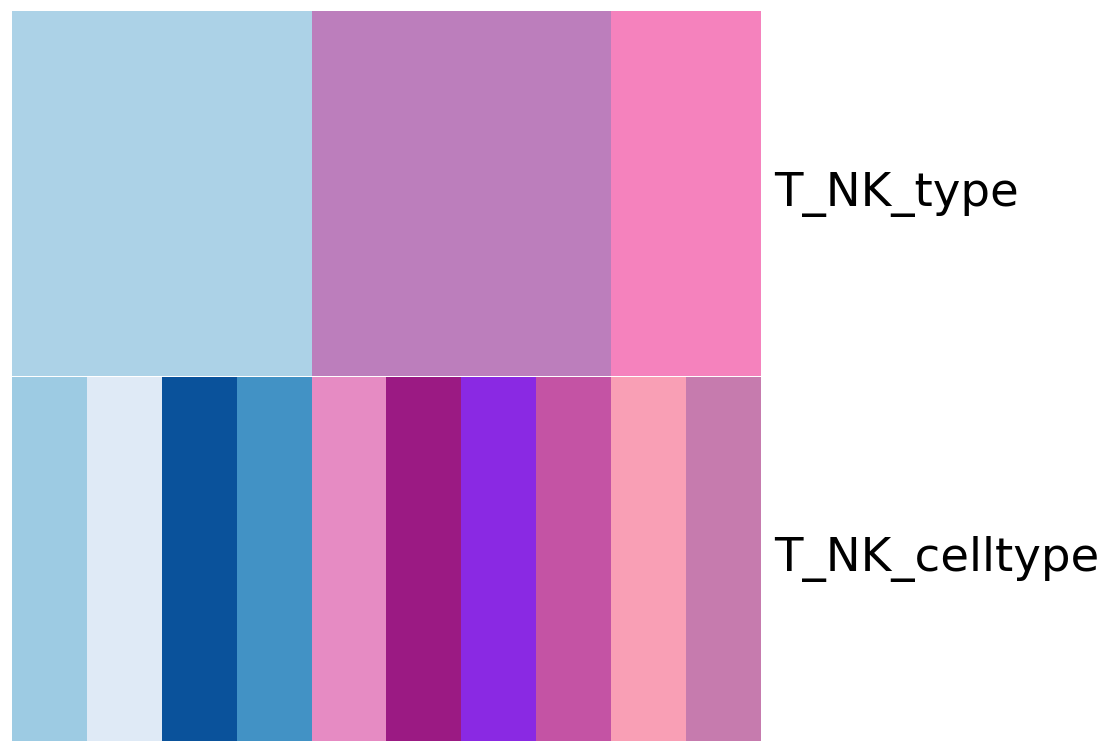

In [ ]:
col_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               T_NK_type=anno_simple(obs.loc[:,'T/NK_type'], colors=type_color_TNK, legend=False, add_text=False, height=5),axis=1, # 绘制T/NK_type注释
               T_NK_celltype=anno_simple(obs.loc[:,'T/NK_celltype'], colors=type_color_rna, legend=False, add_text=False, height=5), # 绘制T/NK_celltype注释
               plot=True,legend=False,legend_gap=3,legend_hpad=1,legend_width=3
                           )

Starting plotting HeatmapAnnotations


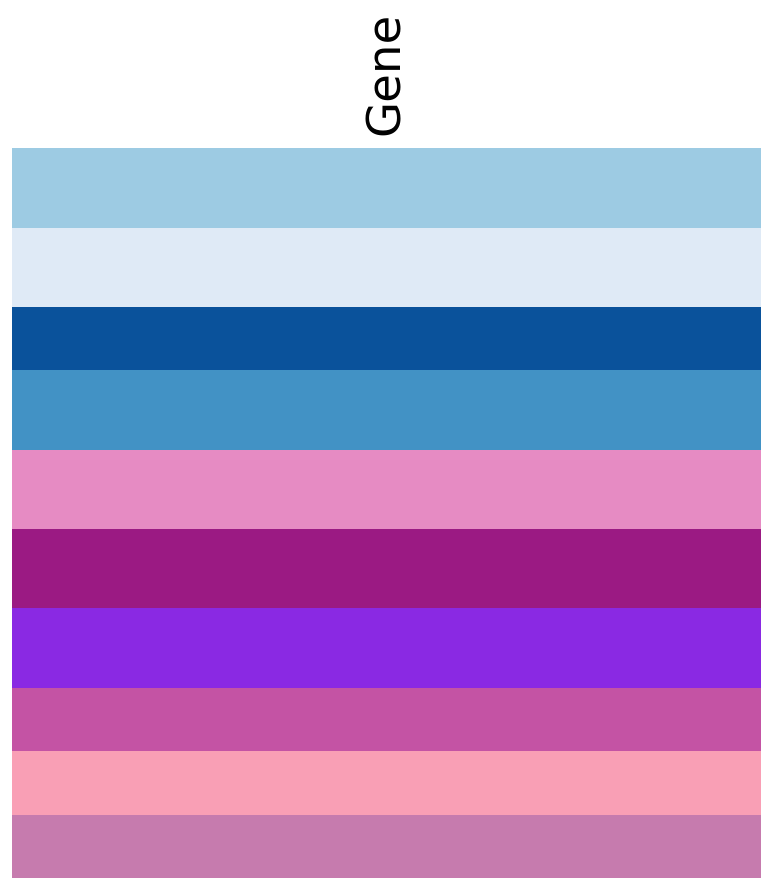

In [ ]:
index_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               Gene=anno_simple(var.loc[:,'celltype'], colors=type_color_rna, add_text=False, legend=False, height=5),axis=0, # 绘制T/NK_type注释
               plot=True,legend=False,legend_gap=3,legend_hpad=0,legend_width=3
                           )

In [ ]:
Gene_Expression.columns = var.index
Gene_Expression

TOX      TOX2      ICOS     CXCR5     PDCD1      CCR7  \
CD4.FH          1.000000  1.000000  1.000000  1.000000  0.957741  0.838109   
CD4.Naive       0.112250  0.087170  0.554104  0.300392  0.282910  1.000000   
CD4.RM          0.221862  0.131586  0.693987  0.201361  0.613568  0.632816   
CD4.Reg         0.523412  0.387886  0.790472  0.508530  0.516353  0.595146   
CD8.EA          0.004533  0.005424  0.400213  0.034132  0.349049  0.090799   
CD8.EM          0.277726  0.039768  0.287501  0.494616  0.546494  0.389856   
CD8.MAIT        0.460590  0.145342  0.446841  0.041753  1.000000  0.116286   
CD8.RM          0.099999  0.032847  0.335654  0.000000  0.737333  0.029176   
NK.CD56_Bright  0.331645  0.131807  0.021052  0.015604  0.000000  0.000000   
NK.CD56_Dim     0.000000  0.000000  0.000000  0.029045  0.144043  0.186501   

                    KLF2     ICAM2     S1PR1     PLAC8  ...     ITGAE  \
CD4.FH          0.394847  0.813607  0.544025  0.377386  ...  0.000000   
CD4.Naive       1.000000  1.000000  1.000000  0.657197  ...  0.026775   
CD4.RM          0.503548  0.828083  0.411022  0.378024  ...  0.273759   
CD4.Reg         0.319444  0.905188  0.205682  0.024628  ...  0.016138   
CD8.EA          0.695719  0.074434  0.006016  0.028073  ...  0.309462   
CD8.EM          0.738634  0.496775  0.436245  0.039061  ...  0.155940   
CD8.MAIT        0.187961  0.354679  0.065781  0.105960  ...  0.649846   
CD8.RM          0.000000  0.000000  0.005831  0.000000  ...  1.000000   
NK.CD56_Bright  0.121820  0.031007  0.000000  0.177894  ...  0.823132   
NK.CD56_Dim     0.947260  0.876665  0.387151  1.000000  ...  0.017014   

                  ZNF683     NCAM1      GZMB     KLRC2     KLRD1      NKG7  \
CD4.FH          0.001995  0.000437  0.000000  0.001031  0.000000  0.000000   
CD4.Naive       0.007614  0.000000  0.017811  0.002368  0.008498  0.047703   
CD4.RM          0.008614  0.029268  0.121790  0.000735  0.006832  0.104387   
CD4.Reg         0.000000  0.006561  0.017734  0.000000  0.000803  0.031238   
CD8.EA          0.272615  0.093527  0.518024  0.094897  0.330119  0.442635   
CD8.EM          0.066650  0.058736  0.340694  0.031818  0.319806  0.742938   
CD8.MAIT        0.016056  0.180768  0.456016  0.019059  0.105759  0.589659   
CD8.RM          1.000000  0.107292  0.950187  0.281872  0.475701  0.670752   
NK.CD56_Bright  0.462156  1.000000  1.000000  1.000000  1.000000  0.833832   
NK.CD56_Dim     0.107450  0.468908  0.833727  0.322656  0.771170  1.000000   

                    CST7     DUSP2      PRF1  
CD4.FH          0.000000  0.000000  0.000000  
CD4.Naive       0.108717  0.079577  0.033618  
CD4.RM          0.206318  0.200734  0.099035  
CD4.Reg         0.272688  0.085263  0.057996  
CD8.EA          0.358671  0.535189  0.317141  
CD8.EM          0.934854  1.000000  0.416771  
CD8.MAIT        0.641529  0.588952  0.466869  
CD8.RM          0.569777  0.469756  0.603719  
NK.CD56_Bright  0.671929  0.440573  0.788446  
NK.CD56_Dim     1.000000  0.884018  1.000000  

[10 rows x 46 columns]

In [ ]:
obs

T/NK_type   T/NK_celltype
CD4.FH               CD4          CD4.FH
CD4.Naive            CD4       CD4.Naive
CD4.RM               CD4          CD4.RM
CD4.Reg              CD4         CD4.Reg
CD8.EA               CD8          CD8.EA
CD8.EM               CD8          CD8.EM
CD8.MAIT             CD8        CD8.MAIT
CD8.RM               CD8          CD8.RM
NK.CD56_Bright        NK  NK.CD56_Bright
NK.CD56_Dim           NK     NK.CD56_Dim

In [ ]:
var

celltype
TOX              CD4.FH
TOX2             CD4.FH
ICOS             CD4.FH
CXCR5            CD4.FH
PDCD1            CD4.FH
CCR7          CD4.Naive
KLF2          CD4.Naive
ICAM2         CD4.Naive
S1PR1         CD4.Naive
PLAC8         CD4.Naive
S100A4           CD4.RM
PTGER4           CD4.RM
IL7R             CD4.RM
NR4A1            CD4.RM
FOXP3           CD4.Reg
CTLA4           CD4.Reg
TNFRSF4         CD4.Reg
IL1R1           CD4.Reg
IL2RA           CD4.Reg
DUSP1            CD8.EA
FOS              CD8.EA
FOSB             CD8.EA
JUN              CD8.EA
CD69             CD8.EA
GZMK             CD8.EM
GZMM             CD8.EM
CXCR4            CD8.EM
CD74             CD8.EM
GZMH             CD8.EM
KLRB1          CD8.MAIT
RORA           CD8.MAIT
NCR3           CD8.MAIT
SLC4A10        CD8.MAIT
ZBTB16         CD8.MAIT
CAPG             CD8.RM
ITGA1            CD8.RM
ITGAE            CD8.RM
ZNF683           CD8.RM
NCAM1    NK.CD56_Bright
GZMB     NK.CD56_Bright
KLRC2    NK.CD56_Bright
KLRD1    NK.CD56_Bright
NKG7        NK.CD56_Dim
CST7        NK.CD56_Dim
DUSP2       NK.CD56_Dim
PRF1        NK.CD56_Dim

In [ ]:
obs.loc[:,'T/NK_type']

CD4.FH            CD4
CD4.Naive         CD4
CD4.RM            CD4
CD4.Reg           CD4
CD8.EA            CD8
CD8.EM            CD8
CD8.MAIT          CD8
CD8.RM            CD8
NK.CD56_Bright     NK
NK.CD56_Dim        NK
Name: T/NK_type, dtype: object

In [ ]:
Gene_Expression.T

CD4.FH  CD4.Naive    CD4.RM   CD4.Reg    CD8.EA    CD8.EM  \
TOX      1.000000   0.112250  0.221862  0.523412  0.004533  0.277726   
TOX2     1.000000   0.087170  0.131586  0.387886  0.005424  0.039768   
ICOS     1.000000   0.554104  0.693987  0.790472  0.400213  0.287501   
CXCR5    1.000000   0.300392  0.201361  0.508530  0.034132  0.494616   
PDCD1    0.957741   0.282910  0.613568  0.516353  0.349049  0.546494   
CCR7     0.838109   1.000000  0.632816  0.595146  0.090799  0.389856   
KLF2     0.394847   1.000000  0.503548  0.319444  0.695719  0.738634   
ICAM2    0.813607   1.000000  0.828083  0.905188  0.074434  0.496775   
S1PR1    0.544025   1.000000  0.411022  0.205682  0.006016  0.436245   
PLAC8    0.377386   0.657197  0.378024  0.024628  0.028073  0.039061   
S100A4   0.000000   0.316382  0.684470  0.554225  0.429015  0.181284   
PTGER4   0.454839   0.621412  0.807594  0.000000  1.000000  0.363143   
IL7R     0.208953   0.844932  1.000000  0.116520  0.684050  0.293814   
NR4A1    0.000000   0.046748  0.354803  0.062690  1.000000  0.100476   
FOXP3    0.029045   0.023766  0.036863  1.000000  0.000000  0.011345   
CTLA4    0.760405   0.268846  0.357286  1.000000  0.067604  0.099679   
TNFRSF4  0.576623   0.337568  0.577106  1.000000  0.019093  0.007126   
IL1R1    0.153453   0.089141  0.230731  1.000000  0.013866  0.001906   
IL2RA    0.118011   0.154449  0.352994  1.000000  0.181144  0.000000   
DUSP1    0.084808   0.156118  0.362585  0.000000  1.000000  0.242620   
FOS      0.136477   0.280094  0.390188  0.000000  1.000000  0.279179   
FOSB     0.000000   0.119379  0.363146  0.010553  1.000000  0.259094   
JUN      0.043860   0.220321  0.417620  0.000000  1.000000  0.275714   
CD69     0.022352   0.302997  0.513416  0.000000  1.000000  0.469161   
GZMK     0.000000   0.013610  0.012017  0.013388  0.179279  1.000000   
GZMM     0.000000   0.056390  0.106628  0.081741  0.177026  1.000000   
CXCR4    0.534808   0.601848  0.603132  0.000000  0.304233  1.000000   
CD74     0.121793   0.000000  0.057896  0.439013  0.003970  1.000000   
GZMH     0.000000   0.022426  0.039980  0.026818  0.516061  0.898914   
KLRB1    0.257303   0.408951  0.596789  0.307621  0.231963  0.000000   
RORA     0.203333   0.428071  0.727754  0.500378  0.415006  0.000000   
NCR3     0.008560   0.000000  0.022524  0.022385  0.027810  0.027053   
SLC4A10  0.000000   0.087631  0.274891  0.015521  0.123274  0.044602   
ZBTB16   0.000113   0.082981  0.136192  0.137856  0.183752  0.000000   
CAPG     0.000000   0.186289  0.416849  0.050851  0.364697  0.222123   
ITGA1    0.000000   0.156921  0.317924  0.007072  0.526602  0.416351   
ITGAE    0.000000   0.026775  0.273759  0.016138  0.309462  0.155940   
ZNF683   0.001995   0.007614  0.008614  0.000000  0.272615  0.066650   
NCAM1    0.000437   0.000000  0.029268  0.006561  0.093527  0.058736   
GZMB     0.000000   0.017811  0.121790  0.017734  0.518024  0.340694   
KLRC2    0.001031   0.002368  0.000735  0.000000  0.094897  0.031818   
KLRD1    0.000000   0.008498  0.006832  0.000803  0.330119  0.319806   
NKG7     0.000000   0.047703  0.104387  0.031238  0.442635  0.742938   
CST7     0.000000   0.108717  0.206318  0.272688  0.358671  0.934854   
DUSP2    0.000000   0.079577  0.200734  0.085263  0.535189  1.000000   
PRF1     0.000000   0.033618  0.099035  0.057996  0.317141  0.416771   

         CD8.MAIT    CD8.RM  NK.CD56_Bright  NK.CD56_Dim  
TOX      0.460590  0.099999        0.331645     0.000000  
TOX2     0.145342  0.032847        0.131807     0.000000  
ICOS     0.446841  0.335654        0.021052     0.000000  
CXCR5    0.041753  0.000000        0.015604     0.029045  
PDCD1    1.000000  0.737333        0.000000     0.144043  
CCR7     0.116286  0.029176        0.000000     0.186501  
KLF2     0.187961  0.000000        0.121820     0.947260  
ICAM2    0.354679  0.000000        0.031007     0.876665  
S1PR1    0.065781  0.005831        0.000000     0.387151  
PLAC8    0.105960  0.000000        0

In [ ]:
var

celltype
TOX              CD4.FH
TOX2             CD4.FH
ICOS             CD4.FH
CXCR5            CD4.FH
PDCD1            CD4.FH
CCR7          CD4.Naive
KLF2          CD4.Naive
ICAM2         CD4.Naive
S1PR1         CD4.Naive
PLAC8         CD4.Naive
S100A4           CD4.RM
PTGER4           CD4.RM
IL7R             CD4.RM
NR4A1            CD4.RM
FOXP3           CD4.Reg
CTLA4           CD4.Reg
TNFRSF4         CD4.Reg
IL1R1           CD4.Reg
IL2RA           CD4.Reg
DUSP1            CD8.EA
FOS              CD8.EA
FOSB             CD8.EA
JUN              CD8.EA
CD69             CD8.EA
GZMK             CD8.EM
GZMM             CD8.EM
CXCR4            CD8.EM
CD74             CD8.EM
GZMH             CD8.EM
KLRB1          CD8.MAIT
RORA           CD8.MAIT
NCR3           CD8.MAIT
SLC4A10        CD8.MAIT
ZBTB16         CD8.MAIT
CAPG             CD8.RM
ITGA1            CD8.RM
ITGAE            CD8.RM
ZNF683           CD8.RM
NCAM1    NK.CD56_Bright
GZMB     NK.CD56_Bright
KLRC2    NK.CD56_Bright
KLRD1    NK.CD56_Bright
NKG7        NK.CD56_Dim
CST7        NK.CD56_Dim
DUSP2       NK.CD56_Dim
PRF1        NK.CD56_Dim

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


Starting plotting HeatmapAnnotations


Starting plotting HeatmapAnnotations


Plotting legends..


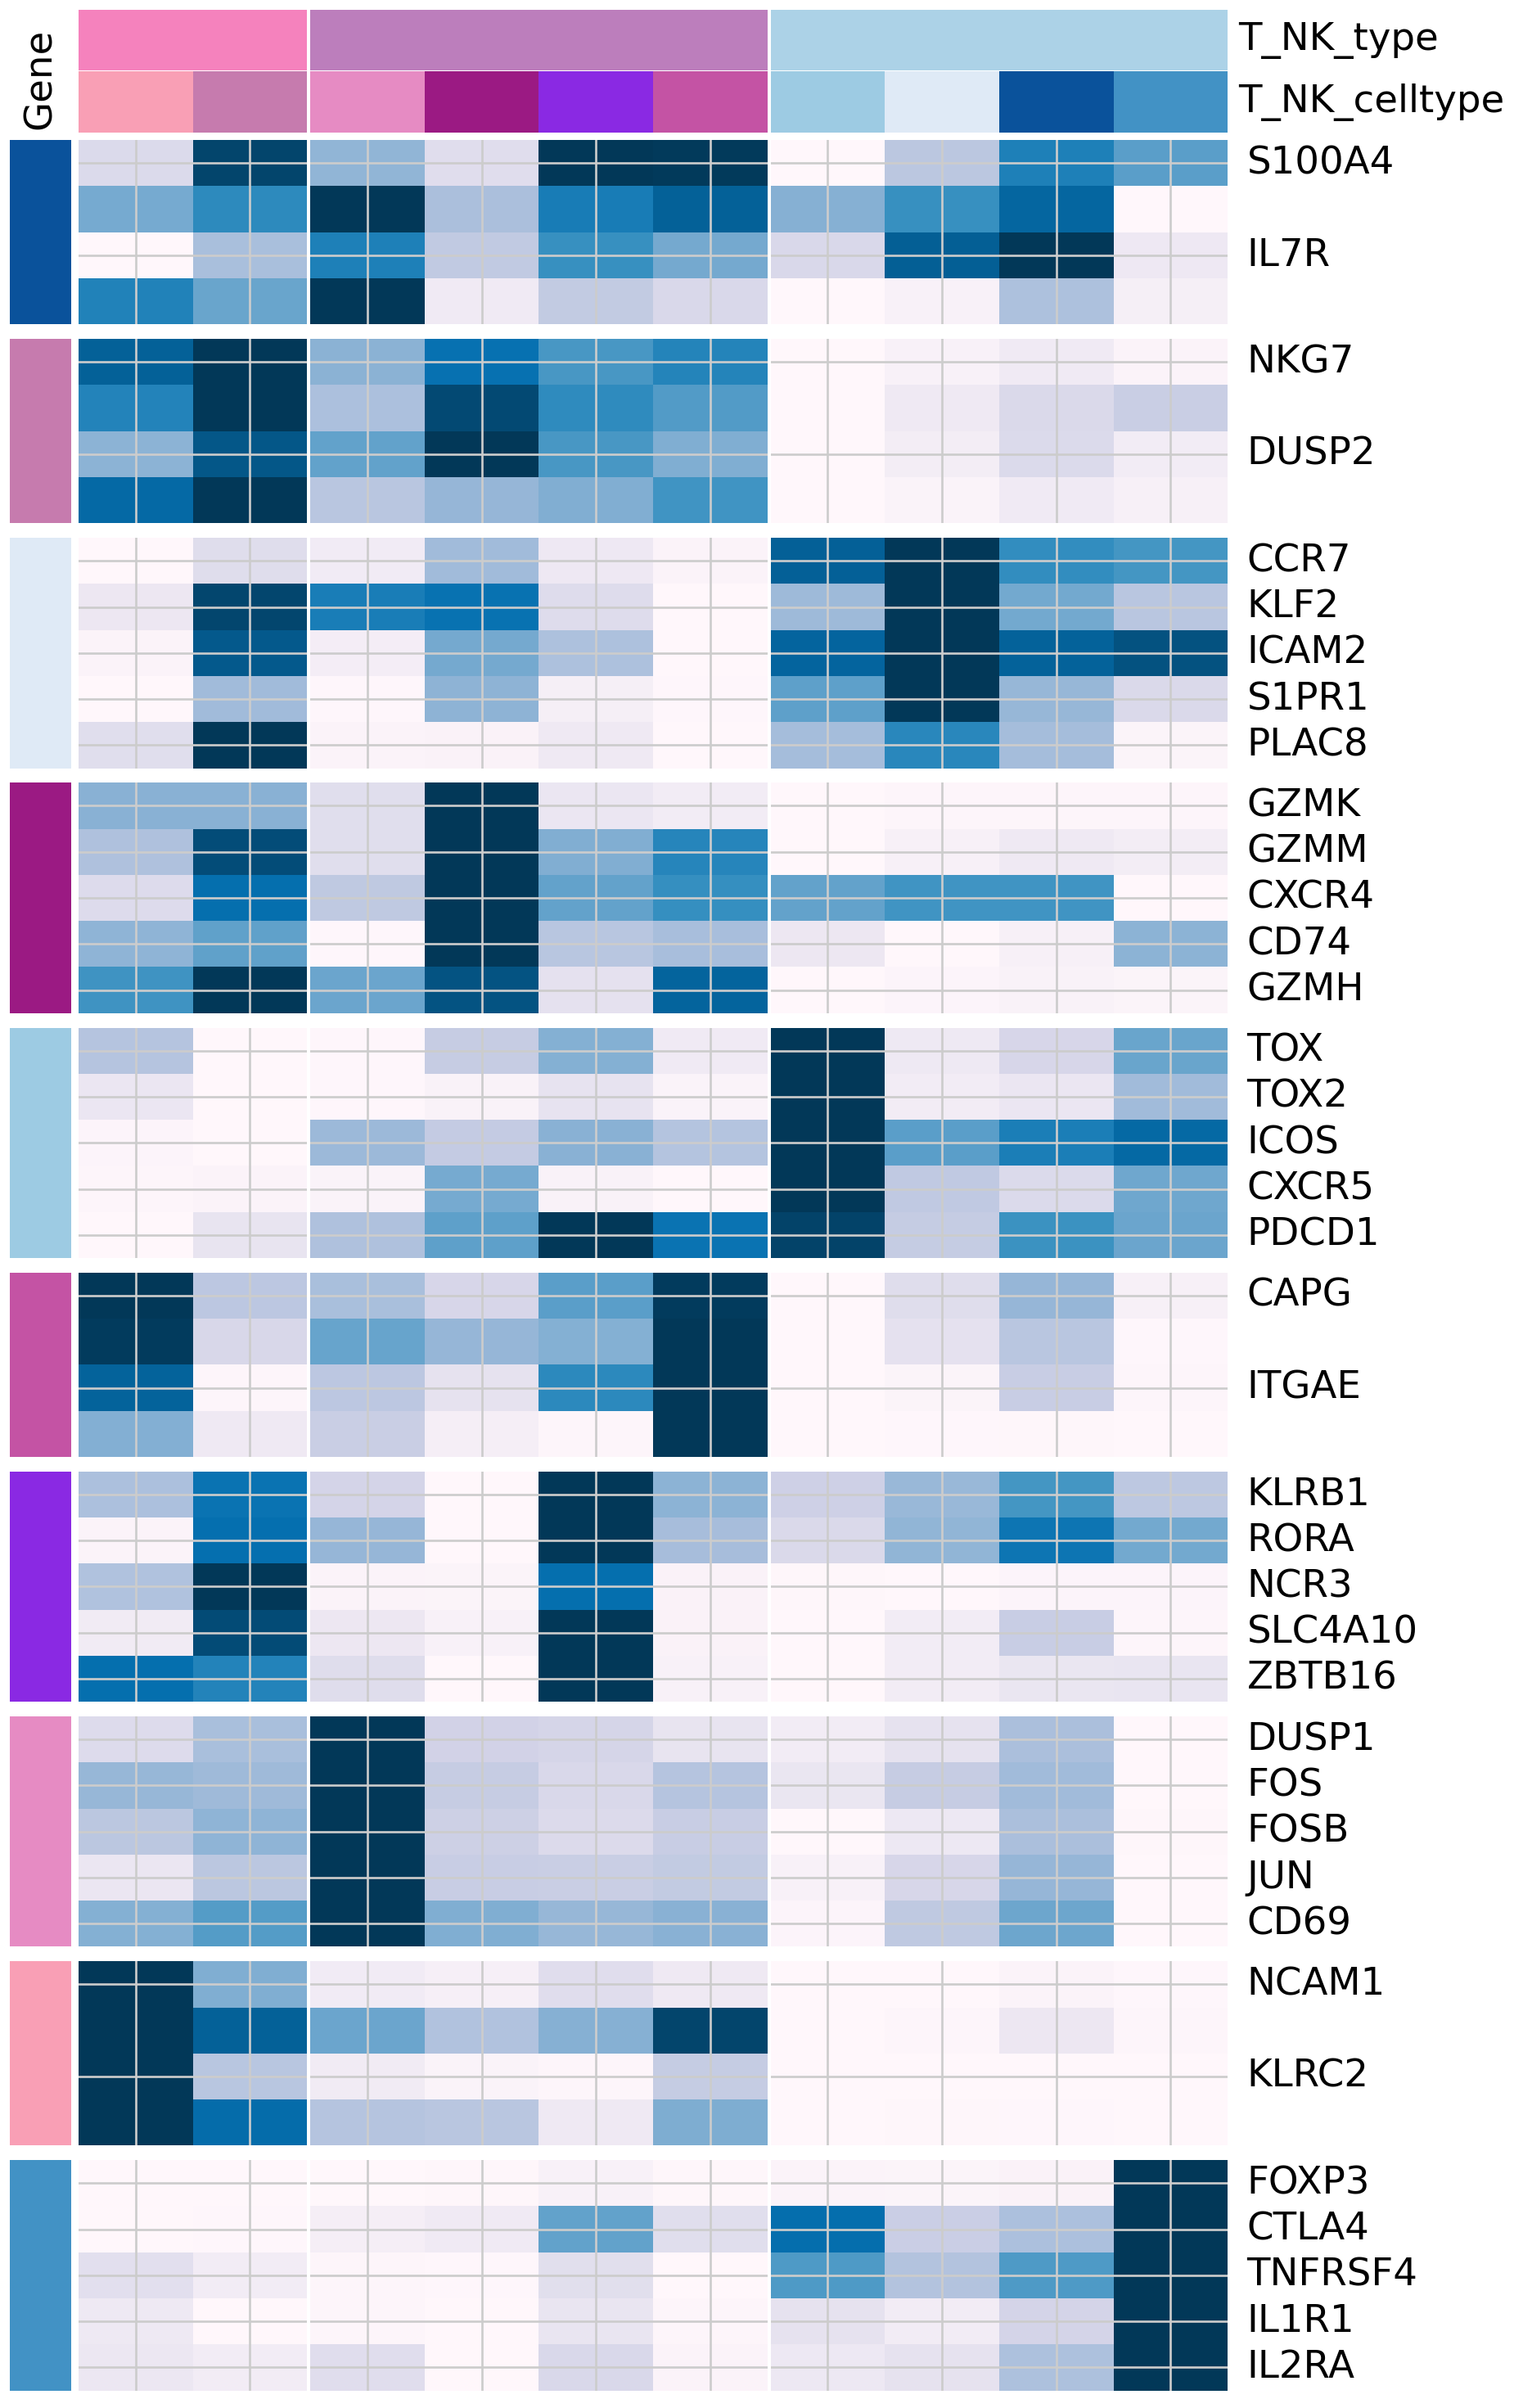

In [ ]:
# 横放注释
col_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               T_NK_type=anno_simple(obs.loc[:,'T/NK_type'], colors=type_color_TNK, add_text=False, legend=False, height=8),axis=1, # 绘制T/NK_type注释
               T_NK_celltype=anno_simple(obs.loc[:,'T/NK_celltype'], colors=type_color_rna, add_text=False, legend=False, height=8), # 绘制T/NK_celltype注释
               plot=False,legend=False,legend_gap=3,legend_hpad=1,legend_width=10
                           )
# 纵放注释
row_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               Gene=anno_simple(var.loc[:,'celltype'], colors=type_color_rna, add_text=False, legend=False, height=8),axis=0, # 绘制T/NK_type注释
               plot=False,legend=False,legend_gap=3,legend_hpad=1,legend_width=10
                           )
plt.figure(figsize=(8, 16))
# 绘制注释
# 绘制基因表达图
cm = ClusterMapPlotter(data=Gene_Expression.T, #z_score = True,
                       top_annotation = col_ha, # 设置上注释
                       left_annotation = row_ha, # 设置左注释
                       row_cluster = False, # 设置禁止自动聚类！！！
                       col_cluster = False, # 设置禁止自动聚类！！！ 这个逼函数聚类参数默认是True
                       row_names_side = 'right',  # 基因名放右边
                       col_split = obs.loc[:,'T/NK_type'] , # 设置纵轴分割
                       row_split = var.loc[:,'celltype'] , # 设置横轴分割
                       label='values',  # 热图颜色设置
                       row_dendrogram = False,
                       show_rownames = True,
                       show_colnames = False,
                       cmap ='PuBu' , # Values的色卡
                       legend = False, # 不画图例 下面画
                      # legend_hpad = 0.5,#热图和图例之间间隙
                      # legend_vpad = 0.5,
                      # legend_side = 'left', # 图例放左边
                       row_split_gap = 2, # 横向分割间距
                       col_split_gap = 0.4, # 纵向分割间距
                       
                       legend_width=60 # 这个数值需要设置的非常大才能完整显示图例
                    # tree_kws={'row_cmap': 'Dark2'}
                    )

# 保存结果
plt.savefig("Figure2_marker.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_marker.png",dpi=300,bbox_inches = 'tight')
plt.show()

## 绘制图例

In [ ]:
type_color_rna = {'CD8.MAIT': '#8A29E3',
 'CD8.EM': '#9B1A83',
 'CD8.RM': '#C453A4',
 'CD8.EA': '#E68BC3',
 'CD4.Reg': '#4292C5',
 'CD4.RM': '#0A529B',
 'CD4.FH': '#9DCBE3',
 'CD4.Naive': '#DFEAF6',
 'NK.CD56_Bright': '#F99FB5',
 'NK.CD56_Dim': '#C67BAE',}

Starting plotting HeatmapAnnotations


<ipython-input-37-c7655ab77b30>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


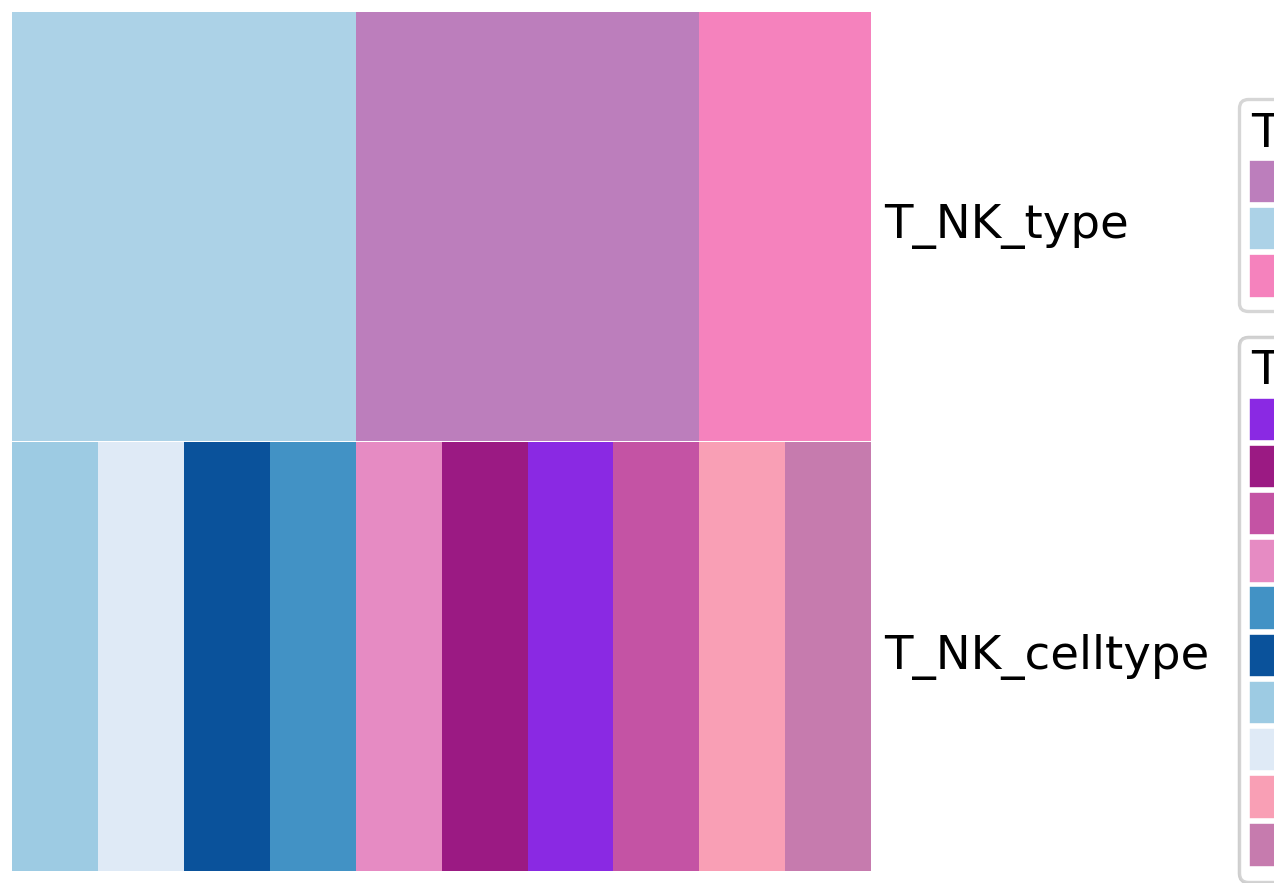

In [ ]:
# 绘制没画出来的图例
col_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               T_NK_type=anno_simple(obs.loc[:,'T/NK_type'], colors=type_color_TNK, add_text=False, legend=True, height=8),axis=1, # 绘制T/NK_type注释
               T_NK_celltype=anno_simple(obs.loc[:,'T/NK_celltype'], colors=type_color_rna, add_text=False, legend=True, height=8), # 绘制T/NK_celltype注释
               plot=True,legend=False,legend_gap=3,legend_hpad=1,legend_width=3
                           )
plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()

No ax was provided, using plt.gca()


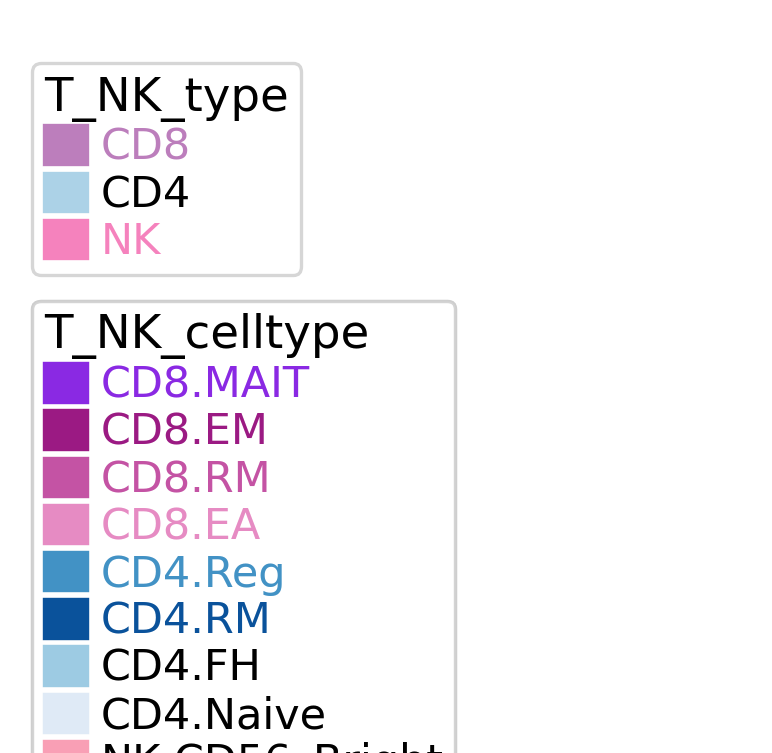

In [ ]:
# 绘制没画出来的图例
plt.figure()
col_ha.plot_legends()
plt.savefig("Figure2_marker_legend_1.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_marker_legend_1.png",dpi=300,bbox_inches = 'tight')
plt.show()

Starting plotting HeatmapAnnotations


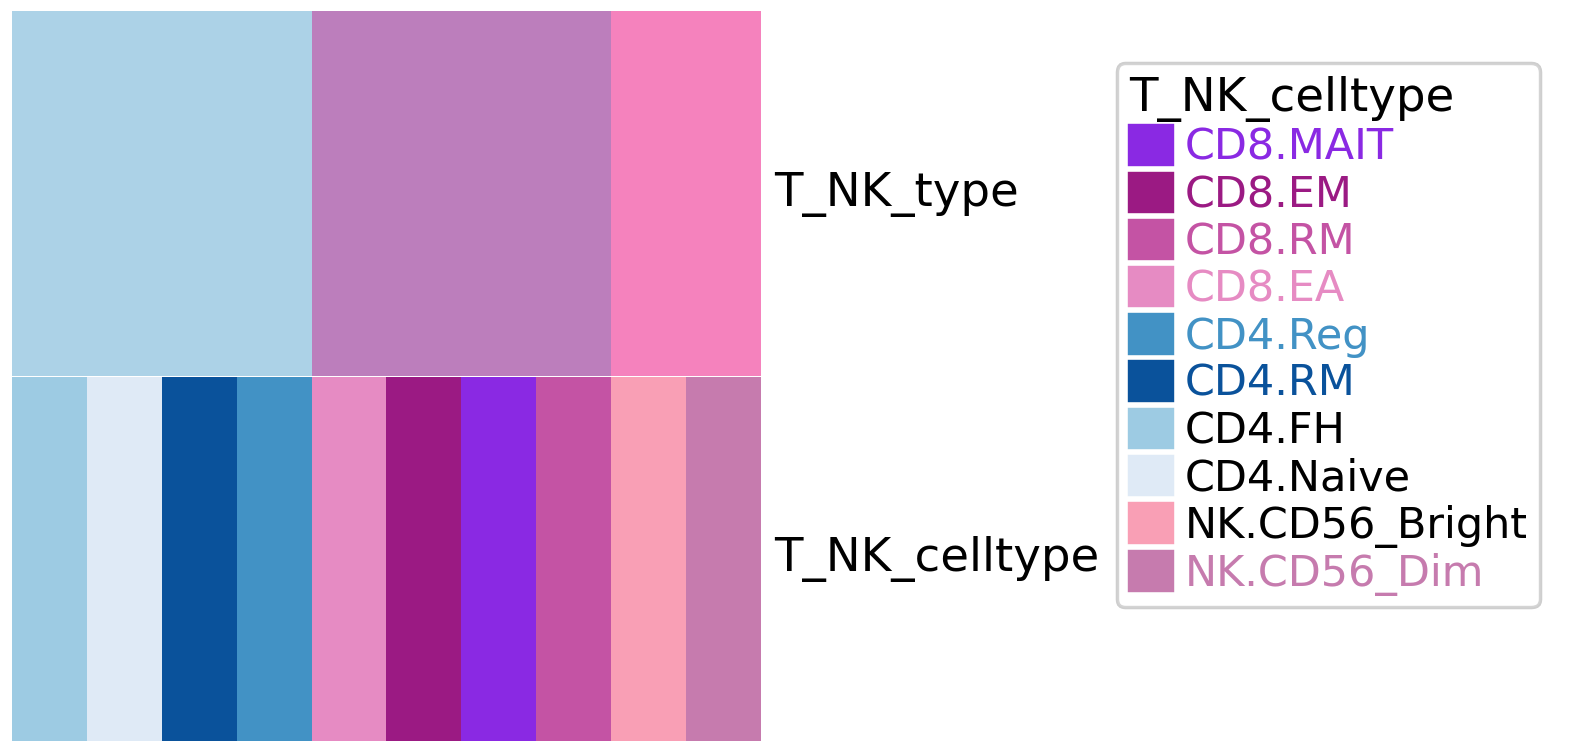

In [ ]:
# 绘制没画出来的图例
col_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               T_NK_type=anno_simple(obs.loc[:,'T/NK_type'], colors=type_color_TNK, add_text=False, legend=False, height=8),axis=1, # 绘制T/NK_type注释
               T_NK_celltype=anno_simple(obs.loc[:,'T/NK_celltype'], colors=type_color_rna, add_text=False, legend=True, height=8), # 绘制T/NK_celltype注释
               plot=True,legend=False,legend_gap=3,legend_hpad=1,legend_width=50
                           )

No ax was provided, using plt.gca()


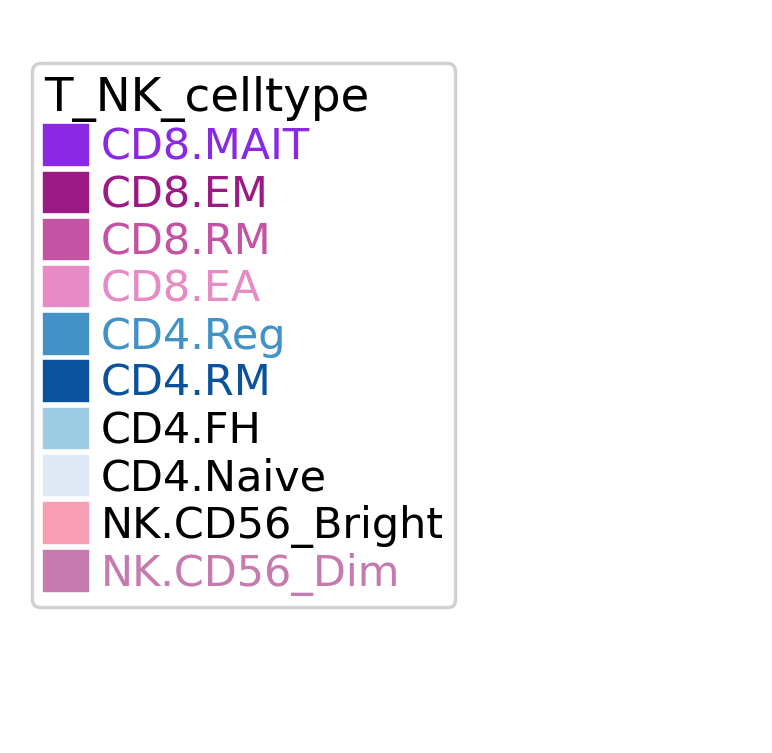

In [ ]:
# 绘制没画出来的图例
plt.figure()
col_ha.plot_legends()
plt.savefig("Figure2_marker_legend_2.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_marker_legend_2.png",dpi=300,bbox_inches = 'tight')
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


Starting plotting HeatmapAnnotations


Starting plotting HeatmapAnnotations


Plotting legends..


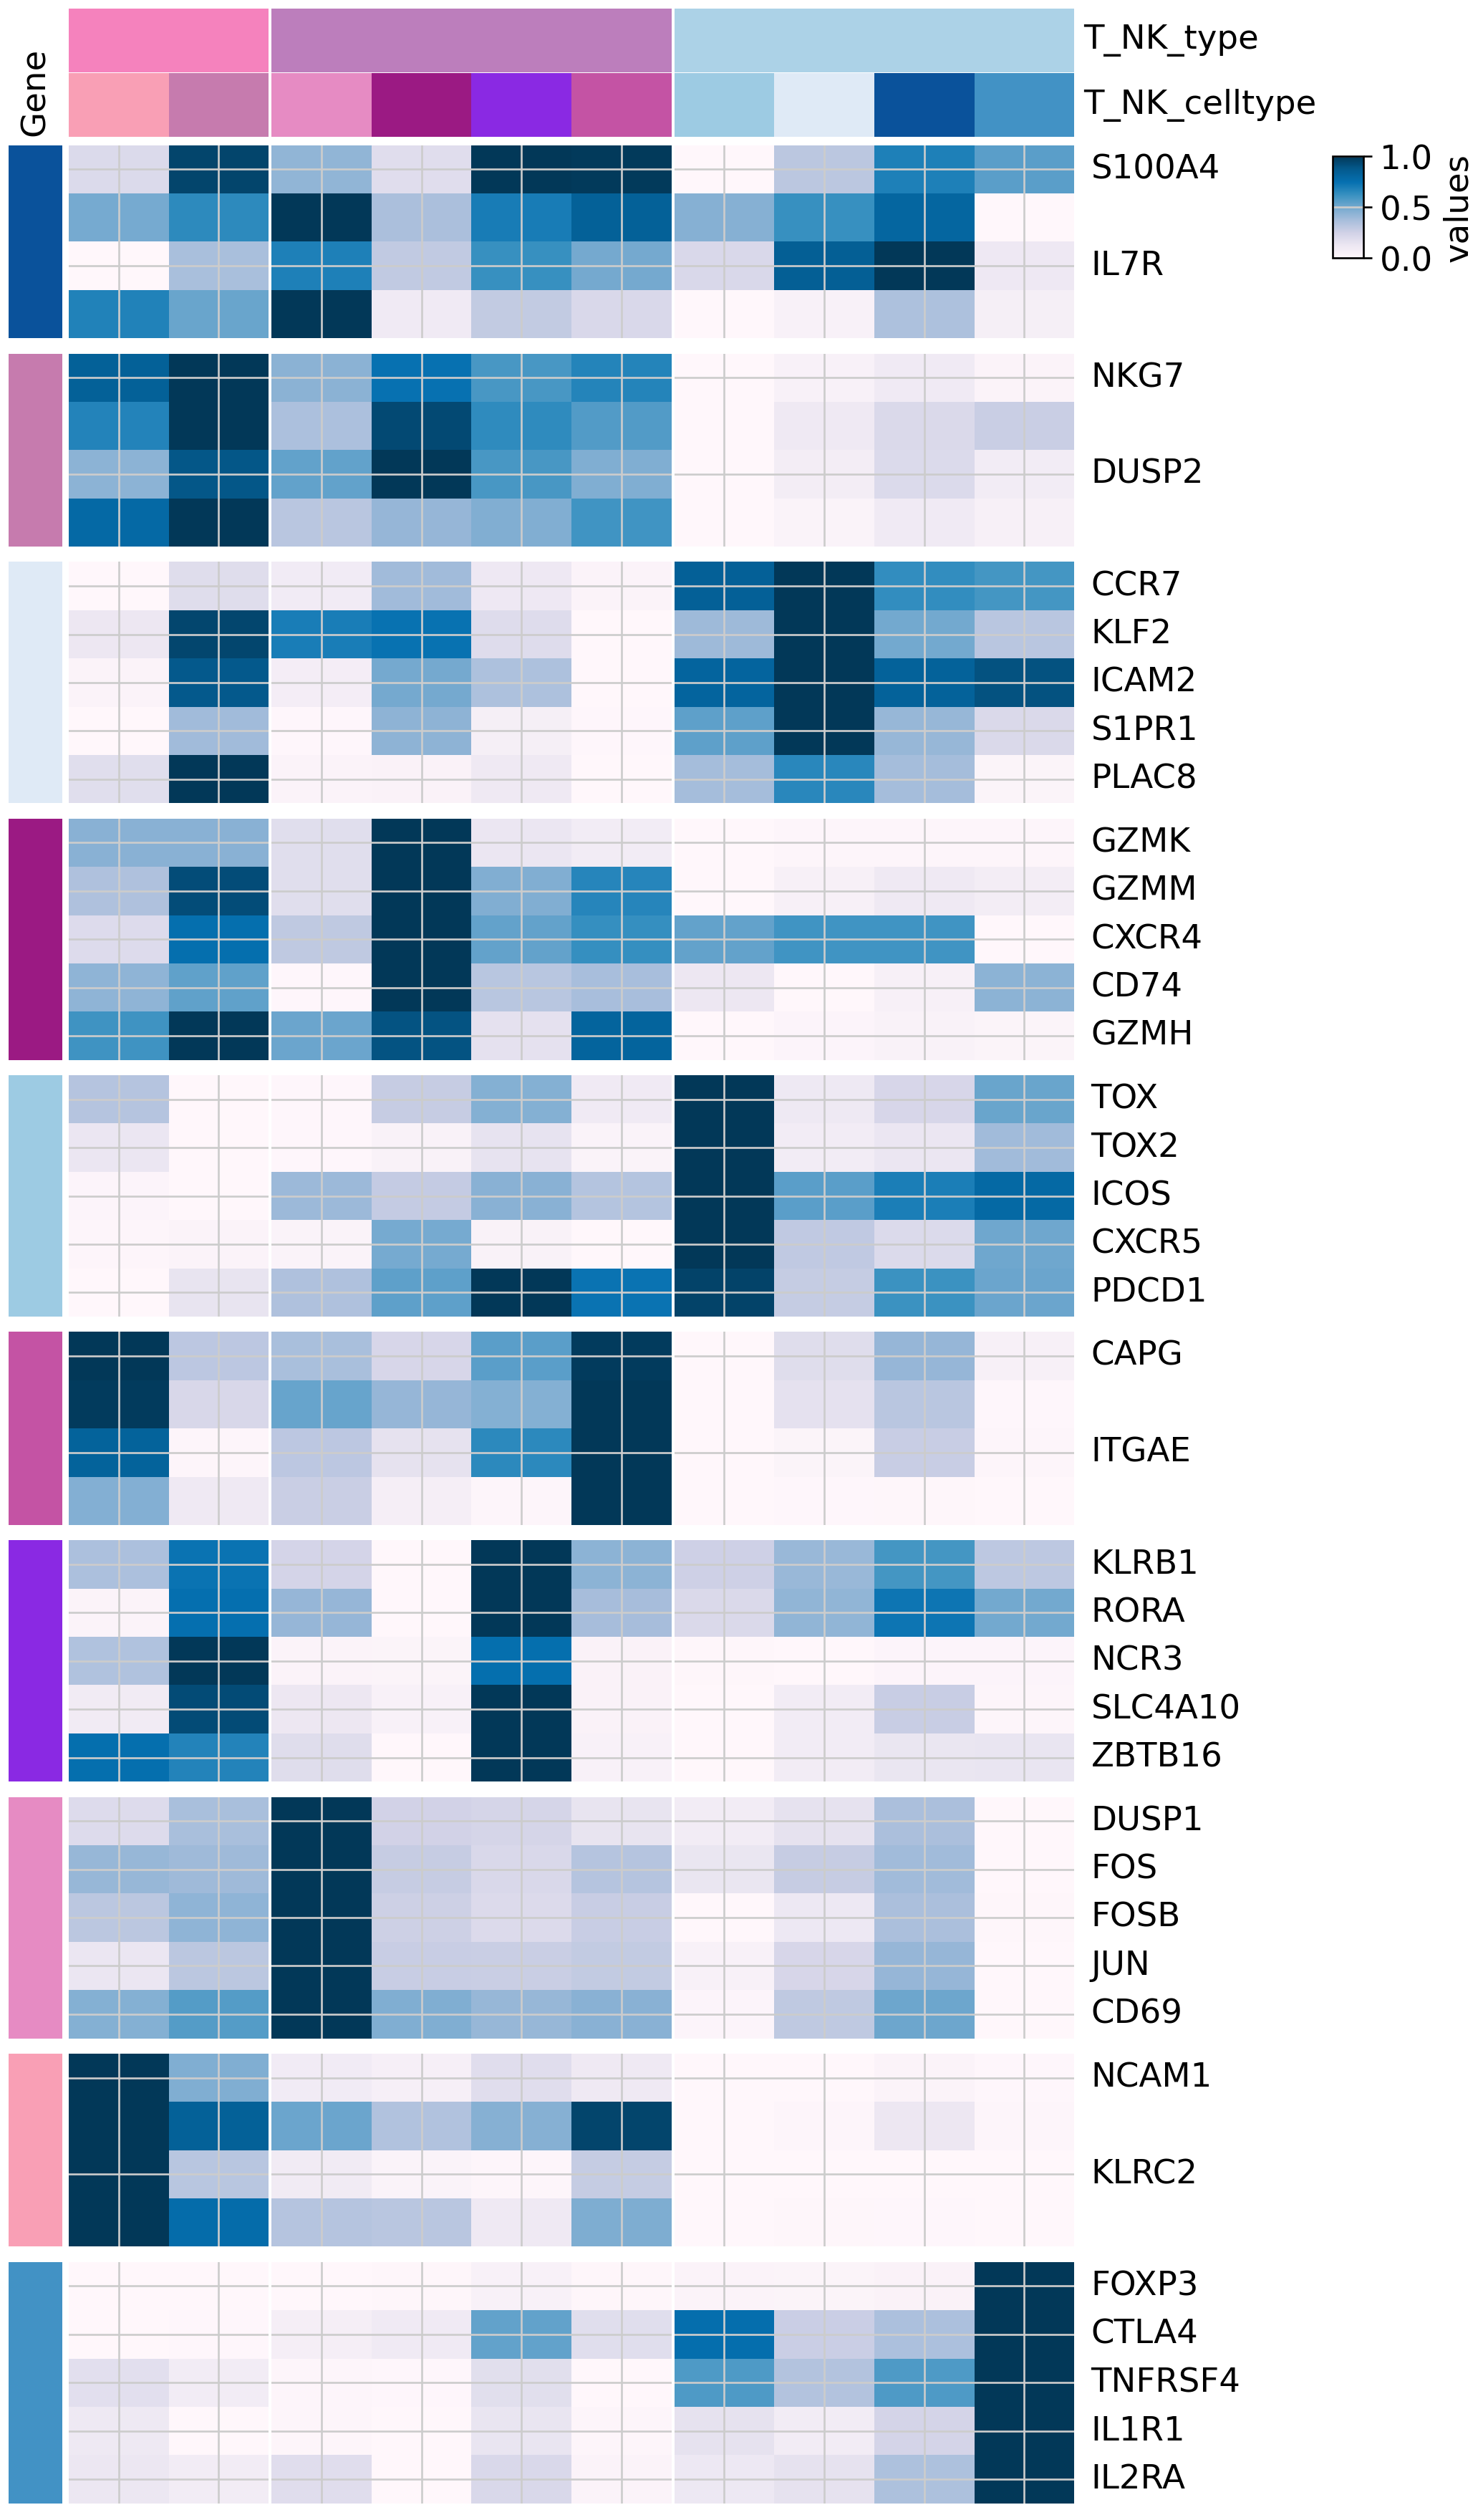

In [ ]:
# 横放注释
col_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               T_NK_type=anno_simple(obs.loc[:,'T/NK_type'], colors=type_color_TNK, add_text=False, legend=False, height=8),axis=1, # 绘制T/NK_type注释
               T_NK_celltype=anno_simple(obs.loc[:,'T/NK_celltype'], colors=type_color_rna, add_text=False, legend=False, height=8), # 绘制T/NK_celltype注释
               plot=False,legend=False,legend_gap=3,legend_hpad=1,legend_width=3
                           )
# 纵放注释
row_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               Gene=anno_simple(var.loc[:,'celltype'], colors=type_color_rna, add_text=False, legend=False, height=8),axis=0, # 绘制T/NK_type注释
               plot=False,legend=False,legend_gap=3,legend_hpad=1,legend_width=3
                           )
plt.figure(figsize=(8, 16))
# 绘制注释
# 绘制基因表达图
cm = ClusterMapPlotter(data=Gene_Expression.T, #z_score = True,
                       top_annotation = col_ha, # 设置上注释
                       left_annotation = row_ha, # 设置左注释
                       row_cluster = False, # 设置禁止自动聚类！！！
                       col_cluster = False, # 设置禁止自动聚类！！！ 这个逼函数聚类参数默认是True
                       row_names_side = 'right',  # 基因名放右边
                       col_split = obs.loc[:,'T/NK_type'] , # 设置纵轴分割
                       row_split = var.loc[:,'celltype'] , # 设置横轴分割
                       label='values',  # 热图颜色设置
                       row_dendrogram = False,
                       show_rownames = True,
                       show_colnames = False,
                       cmap ='PuBu' , # Values的色卡
                       legend = True, # 不画图例 下面画
                      # legend_hpad = 0.5,#热图和图例之间间隙
                      # legend_vpad = 0.5,
                      # legend_side = 'left', # 图例放左边
                       row_split_gap = 2, # 横向分割间距
                       col_split_gap = 0.4, # 纵向分割间距
                    # tree_kws={'row_cmap': 'Dark2'}
                    )

plt.show()

Plotting legends..
No ax was provided, using plt.gca()


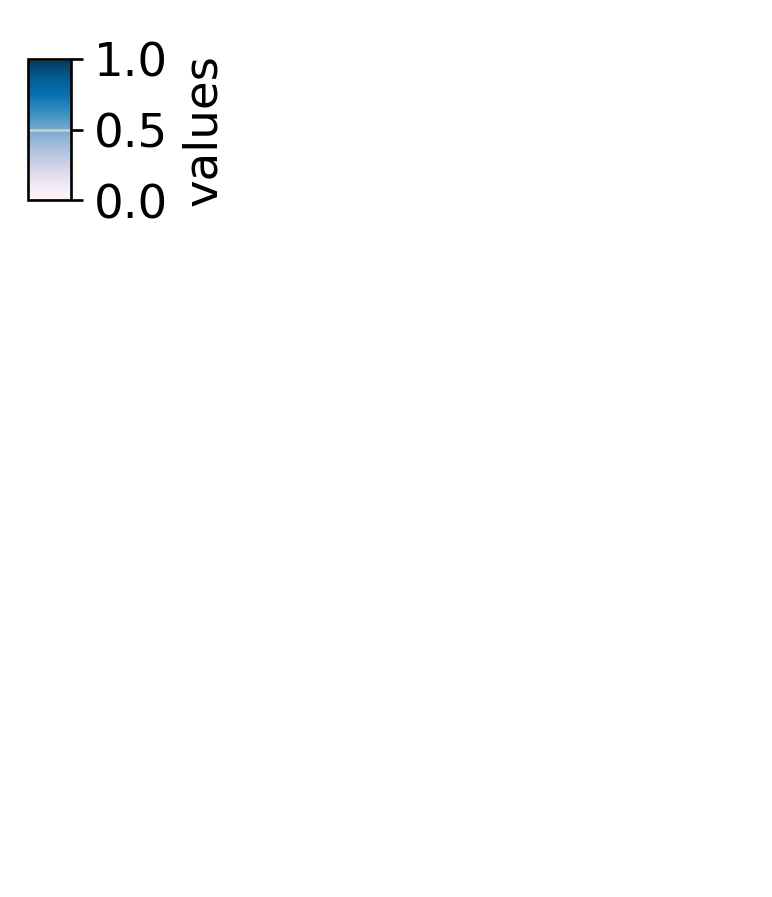

In [ ]:
# 绘制没画出来的图例
plt.figure()
cm.plot_legends()
plt.savefig("Figure2_marker_legend_3.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_marker_legend_3.png",dpi=300,bbox_inches = 'tight')
plt.show()

# Figure_2D Cell Composition

In [ ]:
adata

AnnData object with n_obs × n_vars = 14023 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

In [ ]:
# 装载数据
data = adata[adata.obs['Sample']=='Pos'].obs['T/NK_celltype'].value_counts().to_frame(name='Pos')
data['Neg'] = adata[adata.obs['Sample']=='Neg'].obs['T/NK_celltype'].value_counts()
data['Para'] = adata[adata.obs['Sample']=='Para'].obs['T/NK_celltype'].value_counts()
data = data.T
data = data.fillna(0)
data['Type'] = data.index
data_adata = dat.from_pandas(data, covariate_columns=["Type"])
data_adata.var['type'] = data_adata.var.index.astype('category')
print(data_adata.X)
print(data_adata.obs)

# 重置index以便实现正确颜色对应
data_adata = data_adata[:,adata.obs['T/NK_celltype'].cat.categories]
data_adata

[[2051 1763 1504 1180 1088  714  647  549  385  252]
 [ 715  126  229   82    7   16   89  132   31   69]
 [ 548  430  370  386  114   80   77  195   22  172]]
      Type
Pos    Pos
Neg    Neg
Para  Para


View of AnnData object with n_obs × n_vars = 3 × 10
    obs: 'Type'
    var: 'type'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


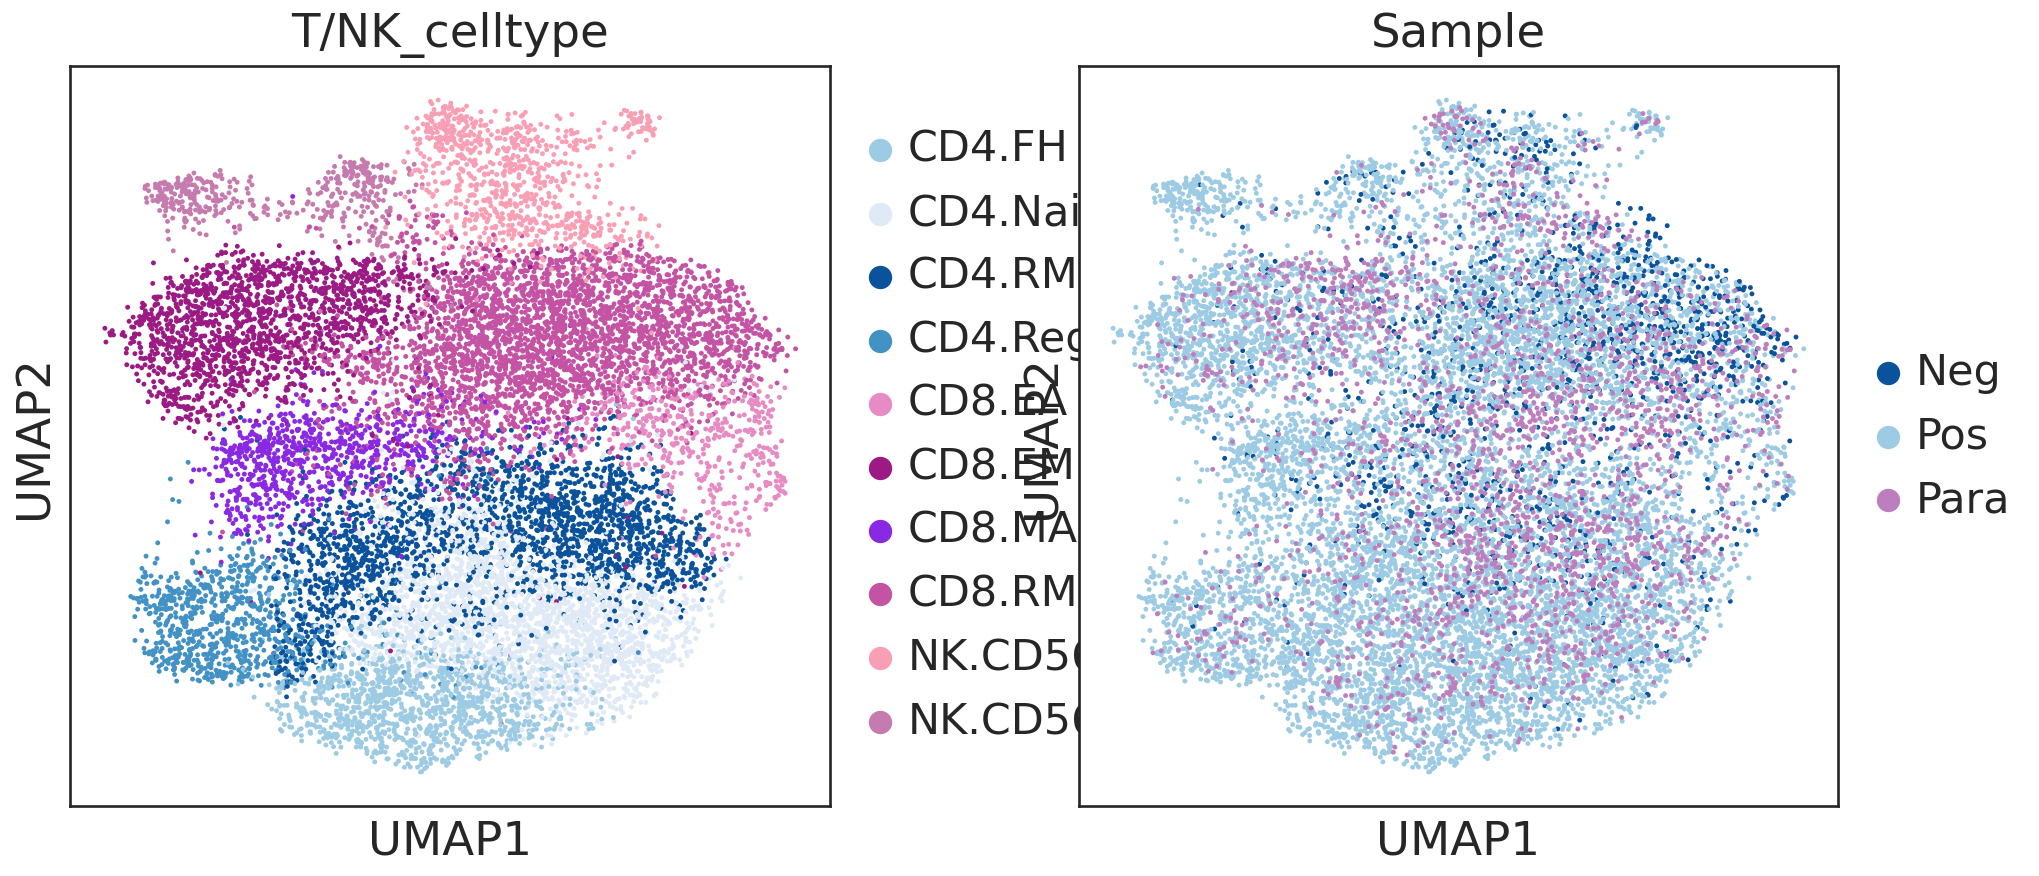

In [ ]:
sc.pl.umap(adata,color=['T/NK_celltype','Sample'])

In [ ]:
type_color_rna={
    'CD8.MAIT':sc_color_Tcell[0],
    'CD8.EM':sc_color_Tcell[1],
    'CD8.RM':sc_color_Tcell[2],
    'NK.CD56_Dim':sc_color_Tcell[3],
    'CD8.EA':sc_color_Tcell[4],
    'CD4.Reg':sc_color_Tcell[7],
    'CD4.RM':sc_color_Tcell[8],
    'CD4.FH':sc_color_Tcell[6],
    'CD4.Naive':sc_color_Tcell[5],
    'NK.CD56_Bright':sc_color_Tcell[9],
}
data_adata.uns['type_colors']=data_adata.var['type'].cat.categories.map(type_color_rna).values.tolist()
data_adata

<ipython-input-47-3022ff488fe0>:13: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  data_adata.uns['type_colors']=data_adata.var['type'].cat.categories.map(type_color_rna).values.tolist()


AnnData object with n_obs × n_vars = 3 × 10
    obs: 'Type'
    var: 'type'
    uns: 'type_colors'

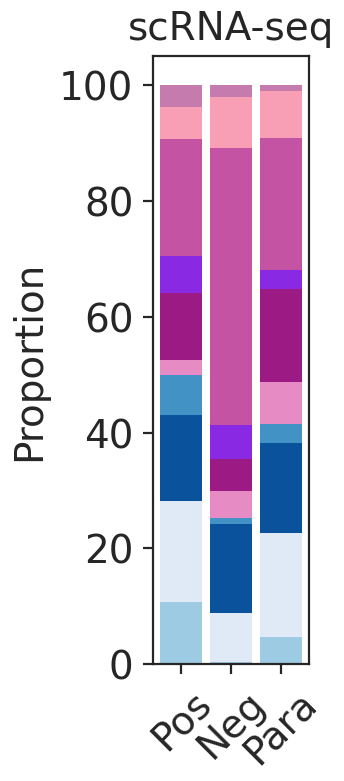

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
sns.set_style("ticks") #设置全局主题

viz.stacked_barplot(data_adata, feature_name="samples",figsize=(1,4),plot_legend=False,cmap=ListedColormap(data_adata.uns['type_colors']))

plt.title("scRNA-seq") #设置标题
plt.savefig("Figure2_CellType_Composition.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_CellType_Composition.png",dpi=300,bbox_inches = 'tight')

# Figure_2E DEG

## Loading data

In [ ]:
adata_neg = adata[adata.obs['Sample']=='Neg']
adata_neg_cd8_TRM = adata_neg[adata_neg.obs['T/NK_celltype']=='CD8.RM']
adata_neg_cd8_TRM

View of AnnData object with n_obs × n_vars = 715 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
# 数据预处理
adata_neg_cd8_TRM = adata_neg_cd8_TRM.raw.to_adata()
sc.pp.filter_genes(adata_neg_cd8_TRM, min_cells=3)
#sc.pp.normalize_total(adata_neg_cd8_activated)
#sc.pp.log1p(adata_neg_cd8_activated)
adata_neg_cd8_TRM

filtered out 18817 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 715 × 13742
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_pos = adata[adata.obs['Sample']!='Neg']
adata_pos_cd8_TRM = adata_pos[adata_pos.obs['T/NK_celltype']=='CD8.RM']
adata_pos_cd8_TRM

View of AnnData object with n_obs × n_vars = 2599 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_pos_cd8_TRM = adata_pos_cd8_TRM.raw.to_adata()
sc.pp.filter_genes(adata_pos_cd8_TRM, min_cells=3)
#sc.pp.normalize_total(adata_pos_cd8_GZMK)
#sc.pp.log1p(adata_pos_cd8_GZMK)

filtered out 15650 genes that are detected in less than 3 cells


In [ ]:
#得到activated跟gzmk共有的基因集
ret_gene=list(set(adata_neg_cd8_TRM.var.index.tolist()) & set(adata_pos_cd8_TRM.var.index.tolist()))
len(ret_gene)
#筛选共有基因
adata_neg_cd8_TRM=adata_neg_cd8_TRM[:,ret_gene]
adata_pos_cd8_TRM=adata_pos_cd8_TRM[:,ret_gene]
adata_pos_cd8_TRM,adata_neg_cd8_TRM

(View of AnnData object with n_obs × n_vars = 2599 × 13587
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 715 × 13587
     obs: 'Group_number', 'Sample', 'n_genes', 'n_gene

In [ ]:
adata_pos_cd8_TRM = adata_pos_cd8_TRM[:,~adata_pos_cd8_TRM.var.index.str.contains('RPS')]
adata_pos_cd8_TRM = adata_pos_cd8_TRM[:,~adata_pos_cd8_TRM.var.index.str.contains('RPL')]
adata_pos_cd8_TRM

View of AnnData object with n_obs × n_vars = 2599 × 13409
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_neg_cd8_TRM = adata_neg_cd8_TRM[:,~adata_neg_cd8_TRM.var.index.str.contains('RPS')]
adata_neg_cd8_TRM = adata_neg_cd8_TRM[:,~adata_neg_cd8_TRM.var.index.str.contains('RPL')]
adata_neg_cd8_TRM

View of AnnData object with n_obs × n_vars = 715 × 13409
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_neg_cd8_TRM.X.max()

7.8880887

In [ ]:
adata_pos_cd8_TRM.X.max()

7.4256577

## CD8_Neg_Trm VS CD8_Pos_Trm

In [ ]:
!pip install adjustText
import adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy  import stats,sparse

def scdeg(adata1,adata2):
    mean1=adata1.X.mean(axis=0)
    mean2=adata2.X.mean(axis=0)

    if sparse.issparse(adata1.X):
        fold=np.array(adata1.X.mean(axis=0)-adata2.X.mean(axis=0))[0]
        #fold=fold[0]
        #log2fold=np.log2(fold)
        ttest = stats.ttest_ind(adata1[:,:].X.toarray(),adata2[:,:].X.toarray())
    else:
        fold=adata1.X.mean(axis=0)-adata2.X.mean(axis=0)
        #log2fold=np.log2(fold)
        ttest = stats.ttest_ind(adata1[:,:].X,adata2[:,:].X) 
    pvalue=ttest.pvalue+1e-50

    res=pd.DataFrame(index=adata1.var.index)
    res['log2FC']=fold
    res['pvalue']=pvalue
    return res

In [ ]:
deg_r=scdeg(adata_pos_cd8_TRM,adata_neg_cd8_TRM)
deg_r['-log10pvalue']=''
deg_r['-log10pvalue']=-np.log10(deg_r['pvalue']+1e-50)
deg_r

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


log2FC        pvalue  -log10pvalue
B2M         0.106075  7.581525e-06      5.120244
ANXA3      -0.015793  4.239935e-03      2.372641
AL121761.1 -0.003246  1.176489e-01      0.929412
AC009113.1  0.000133  9.780540e-01      0.009637
ZNF436     -0.001507  8.197759e-01      0.086305
...              ...           ...           ...
MTFR1L      0.010666  3.382632e-01      0.470745
PARK7       0.018272  5.991553e-01      0.222461
HIST1H3A   -0.028022  2.968331e-03      2.527488
HIST1H3J   -0.036160  9.439708e-07      6.025042
AL050309.1 -0.017783  2.331811e-03      2.632307

[13409 rows x 3 columns]

In [ ]:
deg_r.loc[deg_r.loc[:,'pvalue']==0,'-log10pvalue']=50
deg_r

log2FC        pvalue  -log10pvalue
B2M         0.106075  7.581525e-06      5.120244
ANXA3      -0.015793  4.239935e-03      2.372641
AL121761.1 -0.003246  1.176489e-01      0.929412
AC009113.1  0.000133  9.780540e-01      0.009637
ZNF436     -0.001507  8.197759e-01      0.086305
...              ...           ...           ...
MTFR1L      0.010666  3.382632e-01      0.470745
PARK7       0.018272  5.991553e-01      0.222461
HIST1H3A   -0.028022  2.968331e-03      2.527488
HIST1H3J   -0.036160  9.439708e-07      6.025042
AL050309.1 -0.017783  2.331811e-03      2.632307

[13409 rows x 3 columns]

In [ ]:
group = []
data = deg_r
for i in data.index:
    if data['-log10pvalue'][i] > 20.0 and np.abs(data['log2FC'][i]) >= 0.4:
        group.append('Both significant')
    else:
        group.append('Not significant')
data['group'] = group
data = data.sort_values('group')
print(data)

              log2FC        pvalue  -log10pvalue             group
TFF1       -0.699451  0.000000e+00     50.000000  Both significant
BTG1        0.637667  0.000000e+00     50.000000  Both significant
IL7R        0.605200  1.697309e-26     25.770239  Both significant
GKN1       -1.220012  0.000000e+00     50.000000  Both significant
GNLY        0.651649  4.006061e-33     32.397282  Both significant
...              ...           ...           ...               ...
COMMD3      0.005905  7.339193e-01      0.134352   Not significant
UNC119B    -0.013514  9.733983e-02      1.011709   Not significant
BTF3        0.227017  2.812845e-11     10.550855   Not significant
PKMYT1     -0.003320  4.847543e-01      0.314478   Not significant
AL050309.1 -0.017783  2.331811e-03      2.632307   Not significant

[13409 rows x 4 columns]


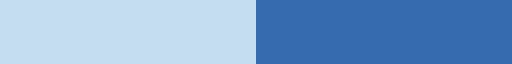

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap([sc_color_Tcell[13],sc_color_Tcell[14]])
cmap

<ipython-input-64-cc3fd86233a6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markers['Gene'] = markers.index


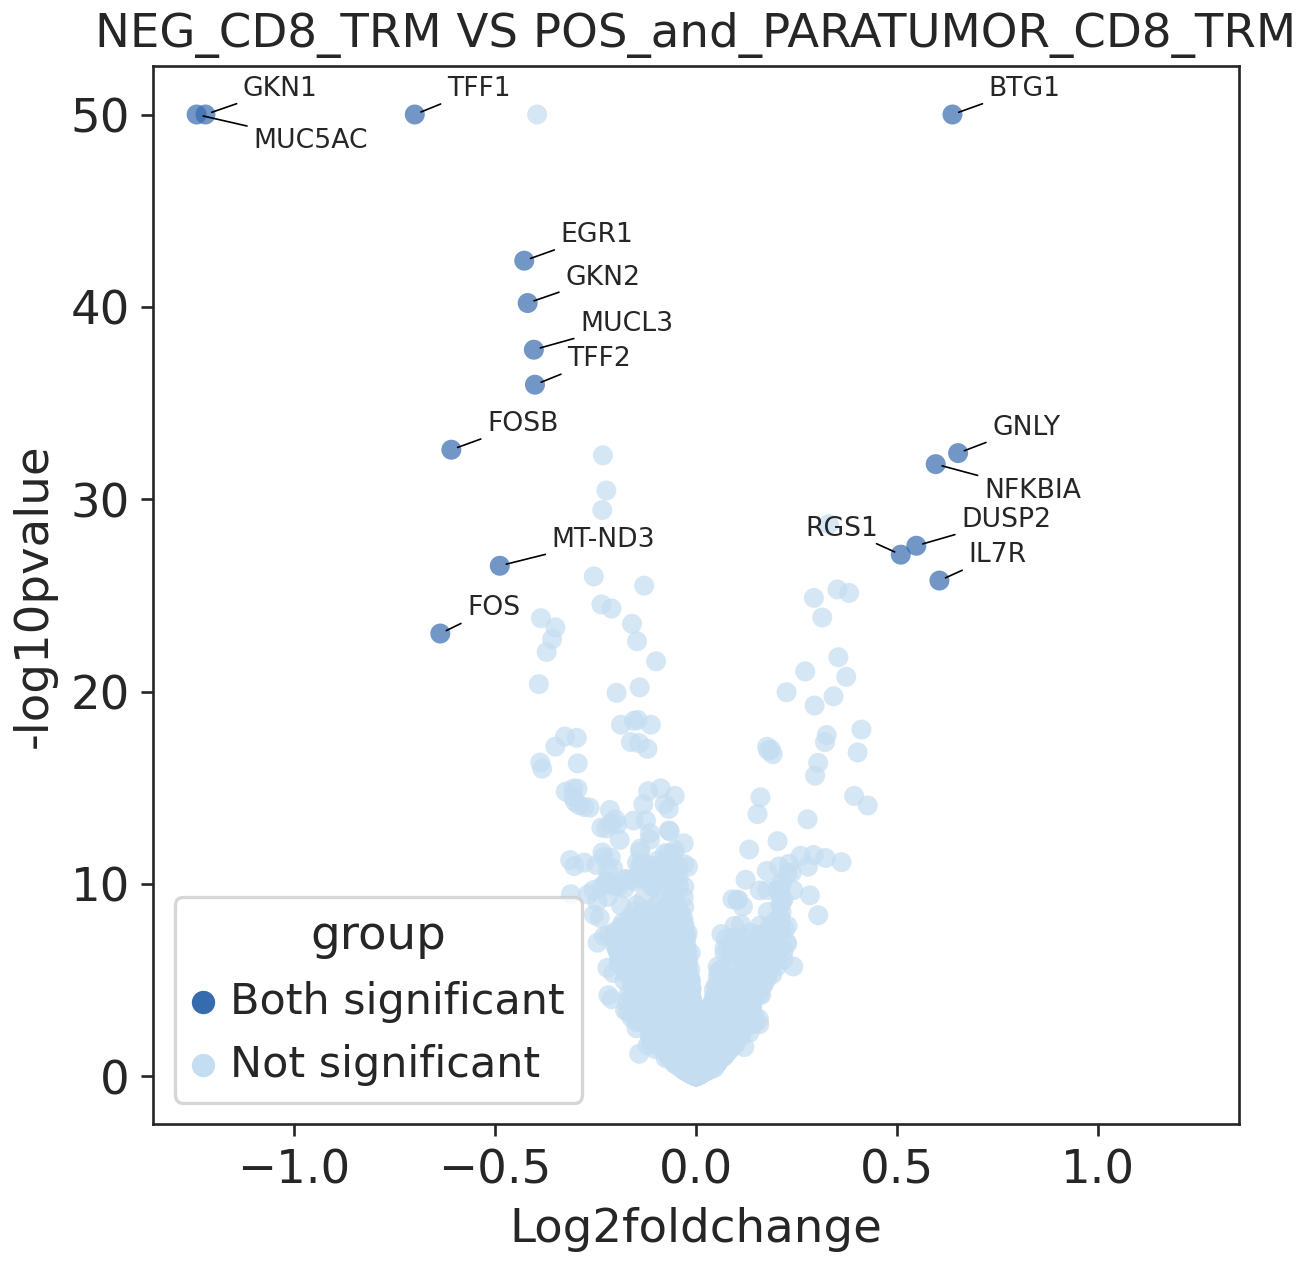

In [ ]:
# Seaborn绘图
f, ax = plt.subplots(figsize=(5.8, 5.8))
sns.set_style("ticks") #设置全局主题
sns.scatterplot(data=data, x="log2FC", y="-log10pvalue", marker='o', alpha=0.7, edgecolor='none', 
                palette=[sc_color_Tcell[14],sc_color_Tcell[13]], # 分类颜色映射
                hue="group", legend='brief',)
#plt.axvline(x = 0.6, ls = '--', color = 'black', lw = 1) #画虚线
#plt.axvline(x = -0.6, ls = '--', color = 'black', lw = 1)
#plt.axhline(y = 30, ls = '--', color = 'black', lw = 1)
plt.xlabel('Log2foldchange')
ax.set_xlim(-1.35,1.35) # 限制x的值为[-1.2,1.2]


# 绘制文本注释
markers = data[data['group'] == 'Both significant']
markers['Gene'] = markers.index
texts = []
for i in markers.index:
    x, y, s = markers.loc[i, 'log2FC'], markers.loc[i, '-log10pvalue'], markers.loc[i, 'Gene']
    texts.append(plt.text(x, y, s, fontsize = 8))

# 文本注释位置优化
from adjustText import adjust_text
adjust_text(texts, force_points=0.2, force_text=1,precision=0.00001,
            expand_points=(2, 2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# 保存
plt.title("NEG_CD8_TRM VS POS_and_PARATUMOR_CD8_TRM") #设置标题
plt.savefig("Figure2_TRM_DEG_.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_TRM_DEG_.png",dpi=300,bbox_inches = 'tight')

# Figure_2F 通路富集

## GSEA(Prerank)

Prerank的输入需要进行排序处理

In [ ]:
!pip install gseapy
!pip install colormap
!pip install easydev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15630 sha256=a278f94b295a6efaffdac9ad84fa40bd6b20944ba356c1cc65eb6257cd7072c7
  Stored in directory: /root/.cache/pip/wheels/bb/25/18/6b007d77ac1220e0530efa2af14569bb803d77f140366fb313
Successfully built colormap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64214 sha256=65d03f296bf99d13e7b95236f7de8c83e3bdb93657bae443f8c69bf3ec1d7ca7
  Stored in director

In [ ]:
# 读取数据
gseada=data
# 删除核糖体基因
gseada = gseada[~gseada.index.str.contains('RPS')]
gseada = gseada[~gseada.index.str.contains('RPL')]
gseada
# 过滤
gseada_sig = gseada[gseada.pvalue < 0.05]
gseada_up = gseada_sig[gseada_sig.log2FC > 0]
gseada_dw = gseada_sig[gseada_sig.log2FC < 0]

In [ ]:
rnk_pos=pd.DataFrame()
rnk_pos['gene_name']=gseada_up.index
rnk_pos['rnk']=gseada_up.loc[:,'log2FC'].values
rnk_pos.dropna()
rnk_pos.sort_values(by=['rnk'],ascending=False,inplace=True)
rnk_pos

gene_name       rnk
2        GNLY  0.651649
0        BTG1  0.637667
1        IL7R  0.605200
4      NFKBIA  0.595964
3       DUSP2  0.547737
..        ...       ...
252     CTPS2  0.012526
88      GINS2  0.012219
95      SCRN1  0.011606
259      GAB2  0.010515
691      LIN9  0.009101

[700 rows x 2 columns]

In [ ]:
import gseapy as gp
import numpy as np
pre_res_pos = gp.prerank(rnk=rnk_pos, # or rnk = rnk,
                     gene_sets='KEGG_2021_Human',
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )
#pre_res_pos.res2d['Term'] = pre_res_pos.res2d.index
pre_res_pos.res2d['-log10pvalue'] = -np.log10((pre_res_pos.res2d['NOM p-val']+0.001).astype('float'))
pre_res_pos

2023-05-16 03:11:39,407 [INFO] Parsing data files for GSEA.............................
2023-05-16 03:11:39,485 [INFO] Downloading and generating Enrichr library gene sets......
2023-05-16 03:11:47,704 [INFO] 0184 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-05-16 03:11:47,708 [INFO] 0136 gene_sets used for further statistical testing.....
2023-05-16 03:11:47,709 [INFO] Start to run GSEA...Might take a while..................
2023-05-16 03:11:48,131 [INFO] Congratulations. GSEApy runs successfully................



In [ ]:
pre_res_pos.res2d

Name                                       Term        ES       NES  \
0    prerank  Natural killer cell mediated cytotoxicity   0.86485  1.696511   
1    prerank                 Autoimmune thyroid disease  0.786352  1.671472   
2    prerank          T cell receptor signaling pathway  0.698604  1.667684   
3    prerank                              Axon guidance  0.839442  1.656327   
4    prerank                     MAPK signaling pathway  0.670869  1.655937   
..       ...                                        ...       ...       ...   
131  prerank                             Tight junction  0.343056  0.740851   
132  prerank                    Cell adhesion molecules  0.314617  0.739015   
133  prerank                                   Lysosome  0.340948  0.734298   
134  prerank                  mRNA surveillance pathway  0.336945  0.728053   
135  prerank                 Inflammatory bowel disease  0.299291  0.690367   

    NOM p-val FDR q-val FWER p-val Tag %  Gene %  \
0     0.00243  0.411531      0.234   4/5   8.86%   
1    0.004657  0.293243      0.307   3/7   3.00%   
2    0.007315  0.206132      0.319  6/12  13.00%   
3    0.006039  0.178257      0.348   3/5   8.86%   
4    0.008377  0.143486      0.349  5/13   8.14%   
..        ...       ...        ...   ...     ...   
131  0.800226  0.844769        1.0   3/7  38.00%   
132   0.80065  0.840122        1.0  1/11   3.00%   
133   0.80091   0.83896        1.0   2/7  20.71%   
134  0.835838  0.839086        1.0   3/7  30.86%   
135  0.863388  0.868929        1.0   8/9  67.43%   

                                            Lead_genes  -log10pvalue  
0                                 GZMB;PRF1;PIK3R1;FYN      2.464689  
1                                      GZMB;PRF1;CTLA4      2.247446  
2                  NFKBIA;CTLA4;MAP3K8;PIK3R1;FYN;CBLB      2.080163  
3                                     CXCR4;PIK3R1;FYN      2.152511  
4                         DUSP2;JUND;MAP3K8;DUSP5;RELB      2.027938  
..                                                 ...           ...  
131                                    MYL6;YBX3;ARPC3      0.096245  
132                                              CTLA4      0.096015  
133                                      LITAF;ATP6V0C      0.095874  
134                                 PPP2R5C;RBM8A;NXT1      0.077359  
135  STAT3;NFKB1;HLA-DQB1;STAT1;IL18RAP;IL21R;IL12R...      0.063291  

[136 rows x 11 columns]

In [ ]:
plot_data2 = pre_res_pos.res2d.sort_values('NES',ascending=False)[:10].sort_values('NES')
plot_data2 = plot_data2.sort_values('Gene %')
plot_data2['matched_size'] = plot_data2.loc[:,'Tag %'].str.split('/').str[0].astype(int)
plot_data2['fraction'] = plot_data2.loc[:,'Tag %'].str.split('/').str[0].astype(int) /plot_data2.loc[:,'Tag %'].str.split('/').str[1].astype(int) 
plot_data2

#
#  term: gene set name,
#  es: enrichment score,
#  nes: normalized enrichment score,
#  pval:  Nominal p-value (from the null distribution of the gene set,
#  fdr: FDR qvalue (adjusted False Discory Rate),
#  fwerp: Family wise error rate p-values,
#  tag %: Percent of gene set before running enrichment peak (ES),
#  gene %: Percent of gene list before running enrichment peak (ES),
#  lead_genes: leading edge genes (gene hits before running enrichment peak),
#  matched genes: genes matched to the data,
# }


Name                                       Term        ES       NES  \
5  prerank                    IL-17 signaling pathway  0.711896  1.621527   
2  prerank          T cell receptor signaling pathway  0.698604  1.667684   
8  prerank                      TNF signaling pathway  0.613939  1.559623   
6  prerank                                  Apoptosis  0.635621  1.612811   
7  prerank             Ubiquitin mediated proteolysis  0.726879  1.590389   
1  prerank                 Autoimmune thyroid disease  0.786352  1.671472   
9  prerank          B cell receptor signaling pathway  0.779592  1.530491   
4  prerank                     MAPK signaling pathway  0.670869  1.655937   
3  prerank                              Axon guidance  0.839442  1.656327   
0  prerank  Natural killer cell mediated cytotoxicity   0.86485  1.696511   

  NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
5  0.008715  0.186143      0.471    3/9   1.29%   
2  0.007315  0.206132      0.319   6/12  13.00%   
8  0.008122  0.258827       0.69  11/18  27.00%   
6  0.003077  0.179357      0.504  11/17  27.00%   
7  0.013468  0.206453      0.595    8/8  28.14%   
1  0.004657  0.293243      0.307    3/7   3.00%   
9  0.030377   0.31338      0.783    2/5   6.43%   
4  0.008377  0.143486      0.349   5/13   8.14%   
3  0.006039  0.178257      0.348    3/5   8.86%   
0   0.00243  0.411531      0.234    4/5   8.86%   

                                          Lead_genes  -log10pvalue  \
5                                NFKBIA;TNFAIP3;JUND      2.012575   
2                NFKBIA;CTLA4;MAP3K8;PIK3R1;FYN;CBLB      2.080163   
8  NFKBIA;TNFAIP3;MAP3K8;PIK3R1;BIRC3;SOCS3;JUNB;...      2.039918   
6  NFKBIA;GZMB;PRF1;ERN1;PIK3R1;BIRC3;CYCS;BAX;BC...      2.389667   
7        UBE2B;BIRC3;CBLB;UBA52;SOCS3;UBC;SKP1;SOCS1      1.839591   
1                                    GZMB;PRF1;CTLA4      2.247446   
9                                      NFKBIA;PIK3R1      1.503393   
4                       DUSP2;JUND;MAP3K8;DUSP5;RELB      2.027938   
3                                   CXCR4;PIK3R1;FYN      2.152511   
0                               GZMB;PRF1;PIK3R1;FYN      2.464689   

   matched_size  fraction  
5             3  0.333333  
2             6  0.500000  
8            11  0.611111  
6            11  0.647059  
7             8  1.000000  
1             3  0.428571  
9             2  0.400000  
4             5  0.384615  
3             3  0.600000  
0             4  0.800000

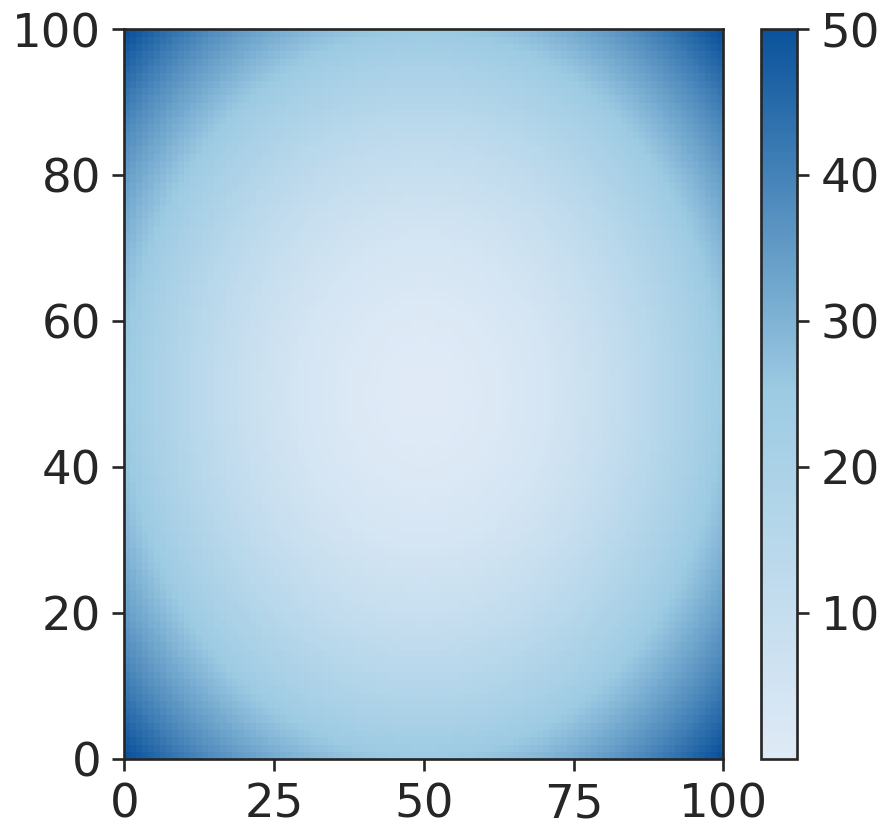

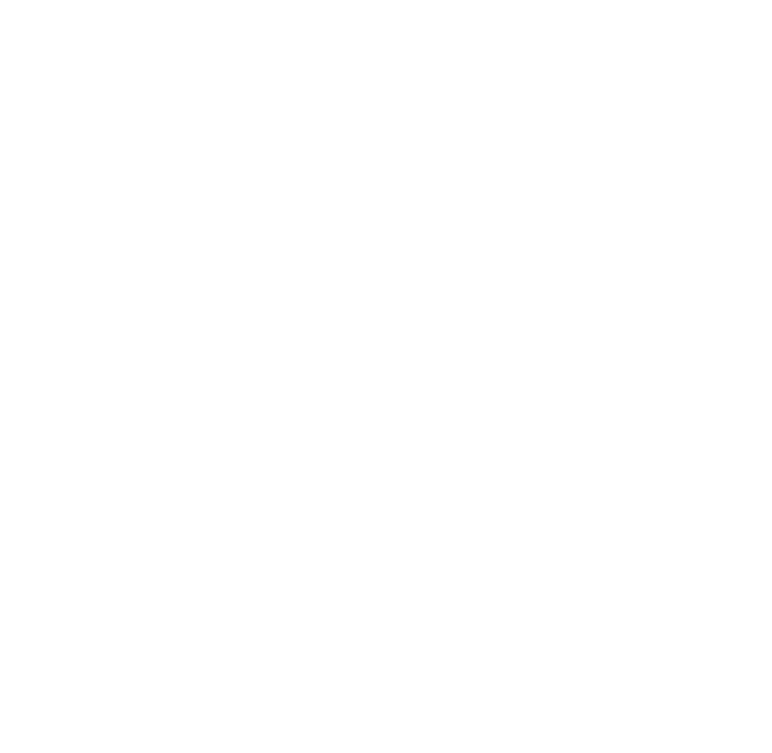

In [ ]:
# 对文字部分过长的通路进行裁剪

def plot_text_set(text):
    if len(text)>40:
        ty=text.split(' ')
        ty_len=len(ty)
        ty_mid=ty_len//2
        res=''
        for i in range(ty_len):
            if i!=ty_mid:
                res+=ty[i]+' '
            else:
                res+='\n'+ty[i]+' '
        return res
    else:
        return text

# 绘图备用函数
# 控制颜色函数
from colormap import Colormap
c = Colormap()
gocmap = c.cmap_linear(sc_color_Tcell[5],sc_color_Tcell[6],sc_color_Tcell[8],)
c.test_colormap(gocmap)

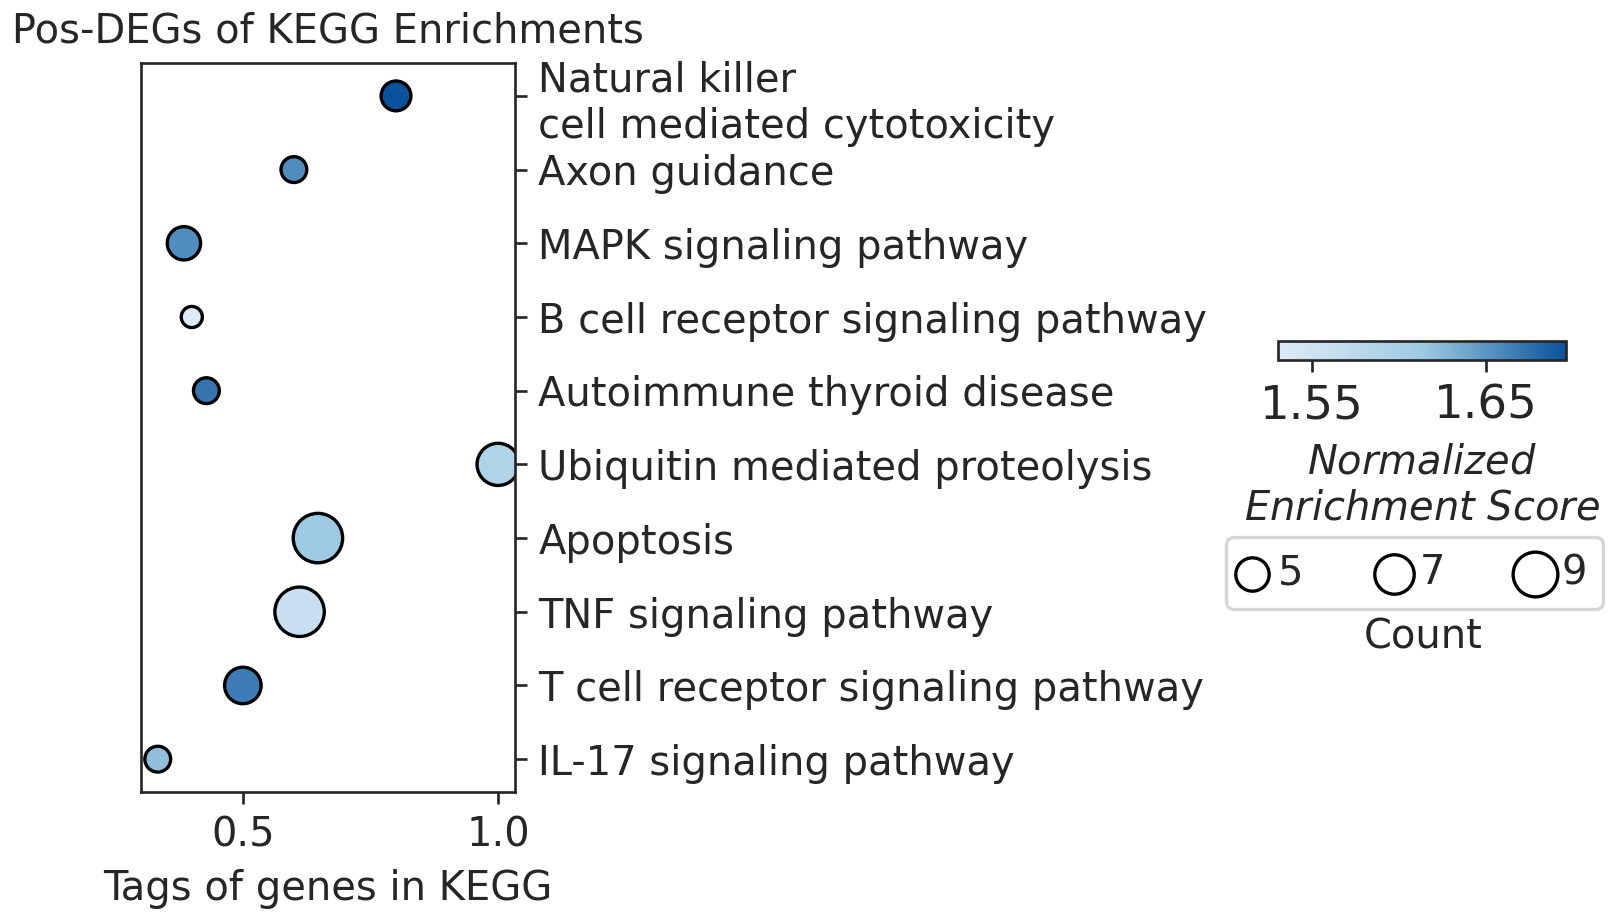

In [ ]:
# color
#gocmap = c.cmap_linear('#F8F8D2','#D0E4B1','#6AC6BD',)

pp=plt.figure(figsize=(2,4))
#用ax控制图片
ax=pp.add_subplot(1,1,1)

#圆圈大小控制
a = 20

#绘制网格线
#plt.grid(b=None, which='major', axis='both', )

#plot_data2 = pre_res_pos.res2d.sort_values('fdr')[:9].sort_values('nes')
b=plt.scatter(plot_data2['fraction'],range(len(plot_data2['NES'])),
           s=plot_data2['matched_size']*a,linewidths=1,edgecolors='black',c=plot_data2['NES'],cmap=gocmap)
ax.yaxis.tick_right()
plt.yticks(range(len(plot_data2['fraction'])),[plot_text_set(i.split('(')[0]) for i in plot_data2['Term']],
          fontsize=12,)
plt.xticks(fontsize=12,)
plt.title('Pos-DEGs of KEGG Enrichments',fontsize=12)
plt.xlabel('Tags of genes in KEGG',fontsize=12)


fig = plt.gcf()
cax = fig.add_axes([2.55, 0.60, 0.6, 0.02])
#im = cax.imshow(plot_data2['logp'], cmap=gocmap)

#绘制图例栏
cb=plt.colorbar(shrink=0.5,cax=cax,orientation='horizontal',ticks=[1.55,1.65,1.75])
cb.set_label(r'$Normalized$'+'\n'+'$Enrichment$ $Score$',fontdict={'size':12})

gll = plt.scatter([],[], s=5*a, marker='o', color='white',edgecolors='black')
gl = plt.scatter([],[], s=7*a, marker='o', color='white',edgecolors='black')
ga = plt.scatter([],[], s=9*a, marker='o', color='white',edgecolors='black')

plt.legend((gll,gl,ga),
       ('5', '7', '9'),
       loc='lower left',
       ncol=3,bbox_to_anchor=(-0.25, -14),
       fontsize=12)
plt.text(1.58,-15,'Count',fontdict={'size':12}) #这里counts指捕获这个信号通路的基因数目
plt.savefig("Figure2_KEGG.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_KEGG.png",dpi=300,bbox_inches = 'tight')

# Figure_2G 细胞毒性与细胞功能障碍基因表达谱

## 细胞毒性基因

In [ ]:
# 设置色卡
sc_color_Gene=['#FAFCCF', #浅色
        '#49B8C2', #中间
        '#0C2064', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

In [ ]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

In [ ]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

In [ ]:
with plt.rc_context({"figure.figsize": (3, 2)}):
  ax = sc.pl.embedding(adata,
        basis='X_umap',
        color=['GZMA','NKG7'],
        cmap=genecmap,colorbar_loc=None,
        show=False,
        legend_fontsize='xx-large', #文字大小
        )
plt.savefig("Figure2_GZMA_NKG7.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_GZMA_NKG7.png",dpi=300,bbox_inches = 'tight')

In [ ]:
with plt.rc_context({"figure.figsize": (3, 2)}):
  ax = sc.pl.embedding(adata,
        basis='X_umap',
        color=['GZMK','GZMB'],
        cmap=genecmap,colorbar_loc=None,
        show=False,
        legend_fontsize='xx-large', #文字大小
        )
plt.savefig("Figure2_GZMK_GZMB.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_GZMK_GZMB.png",dpi=300,bbox_inches = 'tight')

## 细胞耗竭基因

In [ ]:
# 设置色卡
sc_color_Gene=['#F0EDF5', #浅色
        '#E152A4', #中间
        '#642435', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

In [ ]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

In [ ]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

In [ ]:
with plt.rc_context({"figure.figsize": (3, 2)}):
  ax = sc.pl.embedding(adata,
        basis='X_umap',
        color=['TIGIT','CTLA4'],
        cmap=genecmap,colorbar_loc=None,
        show=False,
        legend_fontsize='xx-large', #文字大小
        )
plt.savefig("Figure2_TIGIT_CTLA4.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_TIGIT_CTLA4.png",dpi=300,bbox_inches = 'tight')

In [ ]:
with plt.rc_context({"figure.figsize": (3, 2)}):
  ax = sc.pl.embedding(adata,
        basis='X_umap',
        color=['HAVCR2','LAG3'],
        cmap=genecmap,colorbar_loc=None,
        show=False,
        legend_fontsize='xx-large', #文字大小
        )
plt.savefig("Figure2_HAVCR2_LAG3.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_HAVCR2_LAG3.png",dpi=300,bbox_inches = 'tight')

# Figure 2_H

In [ ]:

marker_genes_dict_var = {
    'Cytotoxic':['NKG7','GZMH','GNLY','IFNG','GZMB','GZMK','PRF1','GZMA','FASLG','TNF'],
    'Inhibitory':['CTLA4','HAVCR2','TIGIT','LAG3','PDCD1','BTLA',]
  
}
marker_genes_dict = [
    'NKG7','GZMH','GNLY','IFNG','GZMB','GZMK','PRF1','GZMA','FASLG','TNF',
    'CTLA4','HAVCR2','TIGIT','LAG3','PDCD1','BTLA',
  ]
# reference: https://www.jianshu.com/p/0c745b965620


In [ ]:
# 得到基因表达谱
Gene_Expression = Get_average_Gene_Expression(adata,Normalized=True)#,marker_genes_dict_var = marker_genes_dict_var
Gene_Expression = Gene_Expression[marker_genes_dict]
Gene_Expression

In [ ]:
# 获得var（纵轴annotation）
def Get_Celltype_of_MarkerGene(Gene_Expression,groupby):
  var = pd.DataFrame(index = Gene_Expression.columns, columns = groupby)
  for i in marker_genes_dict_var.keys():
    print('Now we get '+str(i))
    gene = marker_genes_dict_var.get(i)
    for j in gene:
      var.loc[j,:] = i
  return var #提取marker基因

var = Get_Celltype_of_MarkerGene(Gene_Expression,['Signature'])
var

In [ ]:
# 得到obs信息（横轴annotation）
obs = pd.DataFrame(index=Gene_Expression.index.unique())
obs['T/NK_type'] = ''
obs['T/NK_celltype'] = obs.index
for i in adata.obs['T/NK_type'].cat.categories:
  obs.loc[obs['T/NK_celltype'].str.contains(i),'T/NK_type'] = i  # 提取信息
obs 

In [ ]:
# 设置色卡
sc_color_Signature=['#1F77B5',
        '#AA41FC',# 这个色卡是从张泽民课题组的论文里拔下来的
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

In [ ]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Signature)):
    plt.scatter(i, 1, c=sc_color_Signature[i], s=200)
plt.show()

In [ ]:
# 颜色字典赋值
Signature_color={
    'Cytotoxic':sc_color_Signature[0],
    'Inhibitory':sc_color_Signature[1],
}

In [ ]:
# 横放注释
col_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               T_NK_type=anno_simple(obs.loc[:,'T/NK_type'], colors=type_color_TNK, add_text=False, legend=False, height=8),axis=1, # 绘制T/NK_type注释
               T_NK_celltype=anno_simple(obs.loc[:,'T/NK_celltype'], colors=type_color_rna, add_text=False, legend=False, height=8), # 绘制T/NK_celltype注释
               plot=False,legend=False,legend_gap=3,legend_hpad=1,legend_width=10
                           )
# 纵放注释
row_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               Gene=anno_simple(var.loc[:,'Signature'], colors=Signature_color, add_text=False, legend=False, height=8),axis=0, # 绘制T/NK_type注释
               plot=False,legend=False,legend_gap=3,legend_hpad=1,legend_width=10
                           )
plt.figure(figsize=(8, 10))
# 绘制注释
# 绘制基因表达图
cm = ClusterMapPlotter(data=Gene_Expression.T, #z_score = True,
                       top_annotation = col_ha, # 设置上注释
                       left_annotation = row_ha, # 设置左注释
                       row_cluster = False, # 设置禁止自动聚类！！！
                       col_cluster = False, # 设置禁止自动聚类！！！ 这个逼函数聚类参数默认是True
                       row_names_side = 'right',  # 基因名放右边
                       col_split = obs.loc[:,'T/NK_type'] , # 设置纵轴分割
                       row_split = var.loc[:,'Signature'] , # 设置横轴分割
                       label='values',  # 热图颜色设置
                       row_dendrogram = False,
                       show_rownames = True,
                       show_colnames = False,
                       cmap ='PuBu' , # Values的色卡
                       legend = False, # 不画图例 下面画
                      # legend_hpad = 0.5,#热图和图例之间间隙
                      # legend_vpad = 0.5,
                      # legend_side = 'left', # 图例放左边
                       row_split_gap = 2, # 横向分割间距
                       col_split_gap = 0.4, # 纵向分割间距
                       
                       legend_width=60 # 这个数值需要设置的非常大才能完整显示图例
                    # tree_kws={'row_cmap': 'Dark2'}
                    )

# 保存结果
plt.savefig("Figure2_Signature.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_Signature.png",dpi=300,bbox_inches = 'tight')
plt.show()

## 图例

In [ ]:
# 纵放注释
row_ha = HeatmapAnnotation(#label=anno_label(obs.loc[:,'T/NK_type'], colors=type_color_TNK, merge=True,rotation=15), # 设置是否有对T/NK_type的文字注释
               Signature=anno_simple(var.loc[:,'Signature'], colors=Signature_color, add_text=False, legend=True, height=8),axis=0, # 绘制T/NK_type注释
               plot=True,legend=False,legend_gap=3,legend_hpad=1,legend_width=10
                           )

In [ ]:
# 绘制没画出来的图例
plt.figure()
row_ha.plot_legends()
plt.savefig("Figure2_Signature_legend_1.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_Signature_legend_1.png",dpi=300,bbox_inches = 'tight')
plt.show()

# Figure_2I

In [ ]:
!pip install decoupler
import decoupler as dc

In [ ]:
Go_result = sc.read_h5ad('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_T_Go_Result.h5ad')

In [ ]:
Go_result.obs.loc[:,'T/NK_celltype'] = adata.obs['T/NK_celltype']
Go_result.obs.loc[:,'T/NK_celltype']

In [ ]:
index = ['T Cell Activation','T Cell Receptor Signaling Pathway','Alpha Beta T Cell Activation','Immune Response',
         'Regulation Of T Cell Activation',
         'Immune Effector Process','Defense Response']

In [ ]:
obs

In [ ]:

# 设置色卡
sc_color_Gene=['#FAFCCF', #浅色
        '#49B8C2', #中间
        '#0C2064', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
#         可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

In [ ]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

In [ ]:
sc.tl.dendrogram(Go_result,groupby='T/NK_celltype')
ax = sc.pl.dotplot(Go_result, index,
              swap_axes=True,standard_scale='var', 
              groupby='T/NK_celltype', show=False, dendrogram=True,
              cmap = genecmap,
              colorbar_title='Mean Go Enrichment\nin group')
plt.savefig("Figure2_GO.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_GO.png",dpi=300,bbox_inches = 'tight')